<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

### Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal wants you to

   - determine the industry factors that are most important in predicting the salary amounts for these data.

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries.

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer this question.

---

### Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to address the question above.

### Factors that impact salary

To predict salary the most appropriate approach would be a regression model.
Here instead we just want to estimate which factors (like location, job title, job level, industry sector) lead to high or low salary and work with a classification model. To do so, split the salary into two groups of high and low salary, for example by choosing the median salary as a threshold (in principle you could choose any single or multiple splitting points).

Use all the skills you have learned so far to build a predictive model.
Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to be able to extrapolate or predict the expected salaries for these listings.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10").

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters:

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [3]:
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
import numpy as np
import pprint
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pandas.io import sql
import sqlite3
import re
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split, KFold, cross_val_predict, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, f1_score, roc_curve, precision_recall_curve, auc, average_precision_score
from sklearn import metrics
import matplotlib.pyplot as plt
import scikitplot as skplt
from matplotlib.colors import ListedColormap
import pickle
from joblib import dump, load
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
plt.style.use('bmh')
%config InlineBackend.figure_format = 'retina'

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is in a `span` with `class='salaryText'`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element='jobTitle'`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 
- Decide which other components could be relevant, for example the region or the summary of the job advert.

### Write 4 functions to extract each item: location, company, job, and salary.

Example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it.
    - Remember to use `try/except` if you anticipate errors.
- **Test** the functions on the results above and simple examples.

In [ ]:
def get_job(soup):

    job = ''

    try:
        job = soup.find('a', attrs = {'data-tn-element':'jobTitle'}).text.strip()
    except:
        job = np.nan

    return job

In [ ]:
def get_summary(soup):

    summary = ''

    try:
        summary = soup.find('div', attrs = {'class':'summary'}).text.strip()
    except:
        summary = np.nan

    return summary

In [ ]:
def get_company(soup):
    company = ''

    try:
        company = soup.find('span', attrs = {'class': 'company'}).text.strip()
    except:
        company = np.nan

    return company

In [ ]:
def get_pay(soup):
    salary = ''

    try:
        salary = soup.find('span', attrs = {'class': 'salaryText'}).text.strip()
    except:
        salary = np.nan

    return salary

In [ ]:
def get_location(soup, city):

    location = ''

    try:
        location = soup.find('span', attrs = {'class':'location'}).text.strip()
        location = location + '&' + city
    except:
        location = np.nan

    return location

In [ ]:
def get_full_summary(search_page):
    
    try:
        job_page_url = 'https://www.indeed.co.uk'+search_page.find('a')['href']
        r = requests.get(job_page_url, 'text')
        soup = BeautifulSoup(r.text, 'lxml')
        summaries = soup.find_all('div', attrs={'id':'jobDescriptionText'})
        job_summary = [s.text.replace('\n','') for s in summaries][0]
    except:
        job_summary = 'NULL'
    return job_summary

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search.
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different.

In [327]:
cities = set(['London', 'Manchester', 'Sheffield', 'Birmingham', 'Leeds', 'Norwich', 'Liverpool',
              'Newcastle', 'Bristol', 'Edinburgh', 'Glasgow', 'Cambridge', 'Oxford'])


job_titles = set(['Data+Engineer', 'Business+Intelligence', 'Machine+Learning', 'Data+Scientist', 
                  'Data+Analyst', 'BI+Analyst'])

In [71]:
url_template = "https://www.indeed.co.uk/jobs?q={}&l={}&start={}"

max_results_per_city = 50
results = []

for job in tqdm(job_titles): 
    for city in cities: 
        for start in range(0, max_results_per_city, 10):   
            r = requests.get(url_template.format(job, city, start))
            bs = BeautifulSoup(r.text, 'lxml')

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [7]:
df2 = pd.DataFrame(columns=['Job_Title', 'Company', 'Location', 'Salary', 'Summary'])

for result in tqdm(results):
    
#     city = result.find('h1', attrs={'id': 'jobsInLocation'}).text.split()[-1]
    
    for item in result.find_all('div', attrs={'data-tn-component': 'organicJob'}):
                               
                               job_info = {'Job_Title': get_job(item),
                                           'Company': get_company(item),      
                                           'Location': get_location(item, city),
                                           'Salary': get_pay(item),
                                           'Summary': get_summary(item),
                                           'Full_Summary': get_full_summary(item)}
                               
                               df2 = df2.append(job_info, ignore_index=True)
df2

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.

In [4]:
indeed = pd.read_csv("~/Desktop/GA_2/DSI13-project-submissions/Isabelle_Tontchev/indeed_df3.csv")

In [5]:
# drop duplicates

indeed.drop_duplicates()

Unnamed: 0                                          Job_Title  \
0              0                Power BI - Principal ICT Specialist   
1              1                   Senior Cost Intelligence Analyst   
2              2                                  Financial Analyst   
3              3                                   Business Analyst   
4              4                                         BI Analyst   
...          ...                                                ...   
2055        3563                           Computer Vision Engineer   
2056        3570              Principal Consultant - Data Scientist   
2057        3575               Cloud Solution Architect - Data & AI   
2058        3581  Research Associate on Interpretable and Explai...   
2059        3584                   Computational and Data Scientist   

                               Company                   Location  \
0     West Midlands Combined Authority  Birmingham B19 3SD&Oxford   
1                     Highways England          Birmingham&Oxford   
2                               Veolia             Cannock&Oxford   
3                       Colmore PS Ltd          Birmingham&Oxford   
4                               Spring          Birmingham&Oxford   
...                                ...                        ...   
2055                   Archangel Group             Harwell&Oxford   
2056        Invenio Business Solutions             Reading&Oxford   
2057                         Microsoft             Reading&Oxford   
2058              University of Oxford              Oxford&Oxford   
2059                 Isotropic Systems             Reading&Oxford   

                        Salary  \
0     £39,378 - £44,317 a year   
1     £33,940 - £37,334 a year   
2                          NaN   
3                          NaN   
4     £40,000 - £45,000 a year   
...                        ...   
2055  £26,000 - £35,000 a year   
2056                       NaN   
2057                       NaN   
2058  £32,817 - £40,322 a year   
2059                       NaN   

                                                Summary  \
0     Hours: 36.5 hours per week.\nAs of the 1st Jul...   
1     The role is based in the Cost Intelligence Gro...   
2     Salary - Competitive salary plus excellent Veo...   
3     Applicants must have proficiency in analyzing ...   
4     BI Analyst - Power BI - DAX - Data visualisati...   
...                                                 ...   
2055  We are looking to enhance the existing compute...   
2056  Understand customer’s data analytics requireme...   
2057  Proven track record of building deep technical...   
2058  You will explore, generalise, and integrate de...   
2059  The role responsibilities involve computationa...   

                                           Full_Summary  
0     Full time permanentHours of Work: 36.5 per wee...  
1     Your new roleThe role is based in the Cost Int...  
2     Job Title - Financial AnalystLocation - Cannoc...  
3     HELP SHAPE OUR AMAZING TECHNOLOGY...SINCE DAY ...  
4     BI Analyst - Power BI - DAX - Data visualisati...  
...                                                 ...  
2055  Archangel Imaging is a startup transforming th...  
2056  Key RolePrincipal Consultant - Data ScientistR...  
2057  Microsoft is an equal opportunity employer. Al...  
2058  Department of Computer Science, Parks Road, Ox...  
2059  We are innovators, we do what we do because we...  

[2060 rows x 7 columns]

In [6]:
indeed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2060 non-null   int64 
 1   Job_Title     2060 non-null   object
 2   Company       2060 non-null   object
 3   Location      2060 non-null   object
 4   Salary        939 non-null    object
 5   Summary       2060 non-null   object
 6   Full_Summary  2060 non-null   object
dtypes: int64(1), object(6)
memory usage: 112.8+ KB


In [7]:
# Drop na

indeed.dropna(inplace=True)

In [8]:
df = indeed.loc[indeed.Salary.str.contains('year')]
df

Unnamed: 0                                          Job_Title  \
0              0                Power BI - Principal ICT Specialist   
1              1                   Senior Cost Intelligence Analyst   
4              4                                         BI Analyst   
5              5                               Intelligence Officer   
6              6                Manual Test Analyst - Systems + UAT   
...          ...                                                ...   
2046        3510  Research Associate in Machine learning for lon...   
2047        3511          Deep Learning Engineer (Machine Learning)   
2048        3528                                     Data Scientist   
2055        3563                           Computer Vision Engineer   
2058        3581  Research Associate on Interpretable and Explai...   

                               Company                   Location  \
0     West Midlands Combined Authority  Birmingham B19 3SD&Oxford   
1                     Highways England          Birmingham&Oxford   
4                               Spring          Birmingham&Oxford   
5          Birmingham Children’s Trust          Birmingham&Oxford   
6                                Modis          Birmingham&Oxford   
...                                ...                        ...   
2046           University of Sheffield           Sheffield&Oxford   
2047                     Drone Defence             Retford&Oxford   
2048                  Heat Recruitment              Oxford&Oxford   
2055                   Archangel Group             Harwell&Oxford   
2058              University of Oxford              Oxford&Oxford   

                        Salary  \
0     £39,378 - £44,317 a year   
1     £33,940 - £37,334 a year   
4     £40,000 - £45,000 a year   
5     £26,999 - £33,799 a year   
6     £41,000 - £50,000 a year   
...                        ...   
2046  £31,866 - £40,322 a year   
2047  £25,000 - £35,000 a year   
2048  £60,000 - £90,000 a year   
2055  £26,000 - £35,000 a year   
2058  £32,817 - £40,322 a year   

                                                Summary  \
0     Hours: 36.5 hours per week.\nAs of the 1st Jul...   
1     The role is based in the Cost Intelligence Gro...   
4     BI Analyst - Power BI - DAX - Data visualisati...   
5     You will be working with a wide range of stake...   
6     Manual Test Analyst - Systems + UAT.\nBrand ne...   
...                                                 ...   
2046  And practical experience handling data from lo...   
2047  Applying various data augmentation techniques ...   
2048  You will be a highly experienced data scientis...   
2055  We are looking to enhance the existing compute...   
2058  You will explore, generalise, and integrate de...   

                                           Full_Summary  
0     Full time permanentHours of Work: 36.5 per wee...  
1     Your new roleThe role is based in the Cost Int...  
4     BI Analyst - Power BI - DAX - Data visualisati...  
5     The Performance and Intelligence team in Birmi...  
6     Manual Test Analyst - Systems + UATBrand new t...  
...                                                 ...  
2046  with high-dimensional molecular measurementsCo...  
2047  Are you a Deep Learning Engineer experienced w...  
2048  DATA SCIENCE / SENIOR DATA SCIENTIST / STATIST...  
2055  Archangel Imaging is a startup transforming th...  
2058  Department of Computer Science, Parks Road, Ox...  

[848 rows x 7 columns]

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

In [9]:
def extract_number(salary):
    salary = str(salary).replace(",","").replace("£","").replace("$","")
    salary = [int(s) for s in salary.split() if s.isdigit()]
    if len(salary)>1:
        salary = (sum(salary)/2)
    else:
        salary = (sum(salary))
    return salary
extract_number("£35,683 - $45,467 a year")

40575.0

In [10]:
df['salary_rate'] = df['Salary'].apply(extract_number)

/Users/mymacbookpro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df

Unnamed: 0                                          Job_Title  \
0              0                Power BI - Principal ICT Specialist   
1              1                   Senior Cost Intelligence Analyst   
4              4                                         BI Analyst   
5              5                               Intelligence Officer   
6              6                Manual Test Analyst - Systems + UAT   
...          ...                                                ...   
2046        3510  Research Associate in Machine learning for lon...   
2047        3511          Deep Learning Engineer (Machine Learning)   
2048        3528                                     Data Scientist   
2055        3563                           Computer Vision Engineer   
2058        3581  Research Associate on Interpretable and Explai...   

                               Company                   Location  \
0     West Midlands Combined Authority  Birmingham B19 3SD&Oxford   
1                     Highways England          Birmingham&Oxford   
4                               Spring          Birmingham&Oxford   
5          Birmingham Children’s Trust          Birmingham&Oxford   
6                                Modis          Birmingham&Oxford   
...                                ...                        ...   
2046           University of Sheffield           Sheffield&Oxford   
2047                     Drone Defence             Retford&Oxford   
2048                  Heat Recruitment              Oxford&Oxford   
2055                   Archangel Group             Harwell&Oxford   
2058              University of Oxford              Oxford&Oxford   

                        Salary  \
0     £39,378 - £44,317 a year   
1     £33,940 - £37,334 a year   
4     £40,000 - £45,000 a year   
5     £26,999 - £33,799 a year   
6     £41,000 - £50,000 a year   
...                        ...   
2046  £31,866 - £40,322 a year   
2047  £25,000 - £35,000 a year   
2048  £60,000 - £90,000 a year   
2055  £26,000 - £35,000 a year   
2058  £32,817 - £40,322 a year   

                                                Summary  \
0     Hours: 36.5 hours per week.\nAs of the 1st Jul...   
1     The role is based in the Cost Intelligence Gro...   
4     BI Analyst - Power BI - DAX - Data visualisati...   
5     You will be working with a wide range of stake...   
6     Manual Test Analyst - Systems + UAT.\nBrand ne...   
...                                                 ...   
2046  And practical experience handling data from lo...   
2047  Applying various data augmentation techniques ...   
2048  You will be a highly experienced data scientis...   
2055  We are looking to enhance the existing compute...   
2058  You will explore, generalise, and integrate de...   

                                           Full_Summary  salary_rate  
0     Full time permanentHours of Work: 36.5 per wee...      41847.5  
1     Your new roleThe role is based in the Cost Int...      35637.0  
4     BI Analyst - Power BI - DAX - Data visualisati...      42500.0  
5     The Performance and Intelligence team in Birmi...      30399.0  
6     Manual Test Analyst - Systems + UATBrand new t...      45500.0  
...                                                 ...          ...  
2046  with high-dimensional molecular measurementsCo...      36094.0  
2047  Are you a Deep Learning Engineer experienced w...      30000.0  
2048  DATA SCIENCE / SENIOR DATA SCIENTIST / STATIST...      75000.0  
2055  Archangel Imaging is a startup transforming th...      30500.0  
2058  Department of Computer Science, Parks Road, Ox...      36569.5  

[848 rows x 8 columns]

In [12]:
df.drop(['Unnamed: 0', 'Salary'], axis=1, inplace=True)

/Users/mymacbookpro/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
df.rename(columns={'Job_Title': 'job_title', 'Company': 'company', 'Location': 'location', 
                   'Summary': 'summary', 'Full_Summary': 'full_summary'}, inplace=True)

/Users/mymacbookpro/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
df.reset_index()

index                                          job_title  \
0        0                Power BI - Principal ICT Specialist   
1        1                   Senior Cost Intelligence Analyst   
2        4                                         BI Analyst   
3        5                               Intelligence Officer   
4        6                Manual Test Analyst - Systems + UAT   
..     ...                                                ...   
843   2046  Research Associate in Machine learning for lon...   
844   2047          Deep Learning Engineer (Machine Learning)   
845   2048                                     Data Scientist   
846   2055                           Computer Vision Engineer   
847   2058  Research Associate on Interpretable and Explai...   

                              company                   location  \
0    West Midlands Combined Authority  Birmingham B19 3SD&Oxford   
1                    Highways England          Birmingham&Oxford   
2                              Spring          Birmingham&Oxford   
3         Birmingham Children’s Trust          Birmingham&Oxford   
4                               Modis          Birmingham&Oxford   
..                                ...                        ...   
843           University of Sheffield           Sheffield&Oxford   
844                     Drone Defence             Retford&Oxford   
845                  Heat Recruitment              Oxford&Oxford   
846                   Archangel Group             Harwell&Oxford   
847              University of Oxford              Oxford&Oxford   

                                               summary  \
0    Hours: 36.5 hours per week.\nAs of the 1st Jul...   
1    The role is based in the Cost Intelligence Gro...   
2    BI Analyst - Power BI - DAX - Data visualisati...   
3    You will be working with a wide range of stake...   
4    Manual Test Analyst - Systems + UAT.\nBrand ne...   
..                                                 ...   
843  And practical experience handling data from lo...   
844  Applying various data augmentation techniques ...   
845  You will be a highly experienced data scientis...   
846  We are looking to enhance the existing compute...   
847  You will explore, generalise, and integrate de...   

                                          full_summary  salary_rate  
0    Full time permanentHours of Work: 36.5 per wee...      41847.5  
1    Your new roleThe role is based in the Cost Int...      35637.0  
2    BI Analyst - Power BI - DAX - Data visualisati...      42500.0  
3    The Performance and Intelligence team in Birmi...      30399.0  
4    Manual Test Analyst - Systems + UATBrand new t...      45500.0  
..                                                 ...          ...  
843  with high-dimensional molecular measurementsCo...      36094.0  
844  Are you a Deep Learning Engineer experienced w...      30000.0  
845  DATA SCIENCE / SENIOR DATA SCIENTIST / STATIST...      75000.0  
846  Archangel Imaging is a startup transforming th...      30500.0  
847  Department of Computer Science, Parks Road, Ox...      36569.5  

[848 rows x 7 columns]

In [15]:
df['location'] = df['location'].str.split('&').str[0]

/Users/mymacbookpro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
# Regex to remove the postcodes!!! 
df['location'] = df['location'].replace(['^[A-Z]{1,2}[0-9]{1,2} ?[0-9][A-Z]{2}(GIR 0AA)|((([ABCDEFGHIJKLMNOPRSTUWYZ][0-9][0-9]?)|(([ABCDEFGHIJKLMNOPRSTUWYZ][ABCDEFGHKLMNOPQRSTUVWXY][0-9][0-9]?)|(([ABCDEFGHIJKLMNOPRSTUWYZ][0-9][ABCDEFGHJKSTUW])|([ABCDEFGHIJKLMNOPRSTUWYZ][ABCDEFGHKLMNOPQRSTUVWXY][0-9][ABEHMNPRVWXY])))) [0-9][ABDEFGHJLNPQRSTUWXYZ]{2})|[A-Z]{1,2}[0-9]{1,2}[A-Z]{1}|[A-Z]{1,2}[0-9]{1}|[0-9]{1}'], [''], regex=True)

/Users/mymacbookpro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
df['location'] = df['location'].str.rstrip()

/Users/mymacbookpro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df.location.map(lambda x: x.replace('"', ''))

0       Birmingham
1       Birmingham
4       Birmingham
5       Birmingham
6       Birmingham
           ...    
2046     Sheffield
2047       Retford
2048        Oxford
2055       Harwell
2058        Oxford
Name: location, Length: 848, dtype: object

In [19]:
list(df.location.unique())

['Birmingham',
 'Coventry',
 'Wolverhampton',
 'Solihull',
 'Norwich',
 'Edinburgh',
 'Liverpool',
 'Runcorn',
 'Ellesmere Port',
 'Warrington',
 'London',
 'Southwark',
 'Leeds',
 'Skipton',
 'Morley',
 'Goole',
 'York',
 'Doncaster',
 'Manchester',
 'Stockport',
 'Bolton',
 'Bristol',
 'Newport',
 'Caldicot',
 'Reading',
 'Ruislip',
 'Slough',
 'Oxford',
 'Bracknell',
 'Uxbridge',
 'Farnborough',
 'Staines-upon-Thames',
 'Thame',
 'Aldershot',
 'Kirkby in Ashfield',
 'Witney',
 'Lichfield',
 'Sutton Coldfield',
 'Tamworth',
 'Warwick',
 'Brierley Hill',
 'Atherstone',
 'Worcester',
 'Cambridge',
 "Bishop's Stortford",
 'Chester',
 'Wirral',
 'St. Asaph',
 'Leyland',
 'Cheshire',
 'Knowsley',
 'Wakefield',
 'Huddersfield',
 'Bradford',
 'Sowerby Bridge',
 'Shipley',
 'Macclesfield',
 'Halifax',
 'Altrincham',
 'Trafford',
 'Hartlepool',
 'Newcastle upon Tyne',
 'Sunderland',
 'Gateshead',
 'Durham',
 'Filton',
 'Lawrence Hill',
 'South Gloucestershire',
 'Newbury',
 'Wokingham',
 'Bas

In [20]:
df.replace({'Southwark': 'London', 'London Bridge Station': 'London', 'Hackney': 'London', 'University of Warwick': 'Coventry', 'University of York': 'York'}, inplace=True)

/Users/mymacbookpro/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [21]:
list(df.location.unique())

['Birmingham',
 'Coventry',
 'Wolverhampton',
 'Solihull',
 'Norwich',
 'Edinburgh',
 'Liverpool',
 'Runcorn',
 'Ellesmere Port',
 'Warrington',
 'London',
 'Leeds',
 'Skipton',
 'Morley',
 'Goole',
 'York',
 'Doncaster',
 'Manchester',
 'Stockport',
 'Bolton',
 'Bristol',
 'Newport',
 'Caldicot',
 'Reading',
 'Ruislip',
 'Slough',
 'Oxford',
 'Bracknell',
 'Uxbridge',
 'Farnborough',
 'Staines-upon-Thames',
 'Thame',
 'Aldershot',
 'Kirkby in Ashfield',
 'Witney',
 'Lichfield',
 'Sutton Coldfield',
 'Tamworth',
 'Warwick',
 'Brierley Hill',
 'Atherstone',
 'Worcester',
 'Cambridge',
 "Bishop's Stortford",
 'Chester',
 'Wirral',
 'St. Asaph',
 'Leyland',
 'Cheshire',
 'Knowsley',
 'Wakefield',
 'Huddersfield',
 'Bradford',
 'Sowerby Bridge',
 'Shipley',
 'Macclesfield',
 'Halifax',
 'Altrincham',
 'Trafford',
 'Hartlepool',
 'Newcastle upon Tyne',
 'Sunderland',
 'Gateshead',
 'Durham',
 'Filton',
 'Lawrence Hill',
 'South Gloucestershire',
 'Newbury',
 'Wokingham',
 'Basingstoke',
 'M

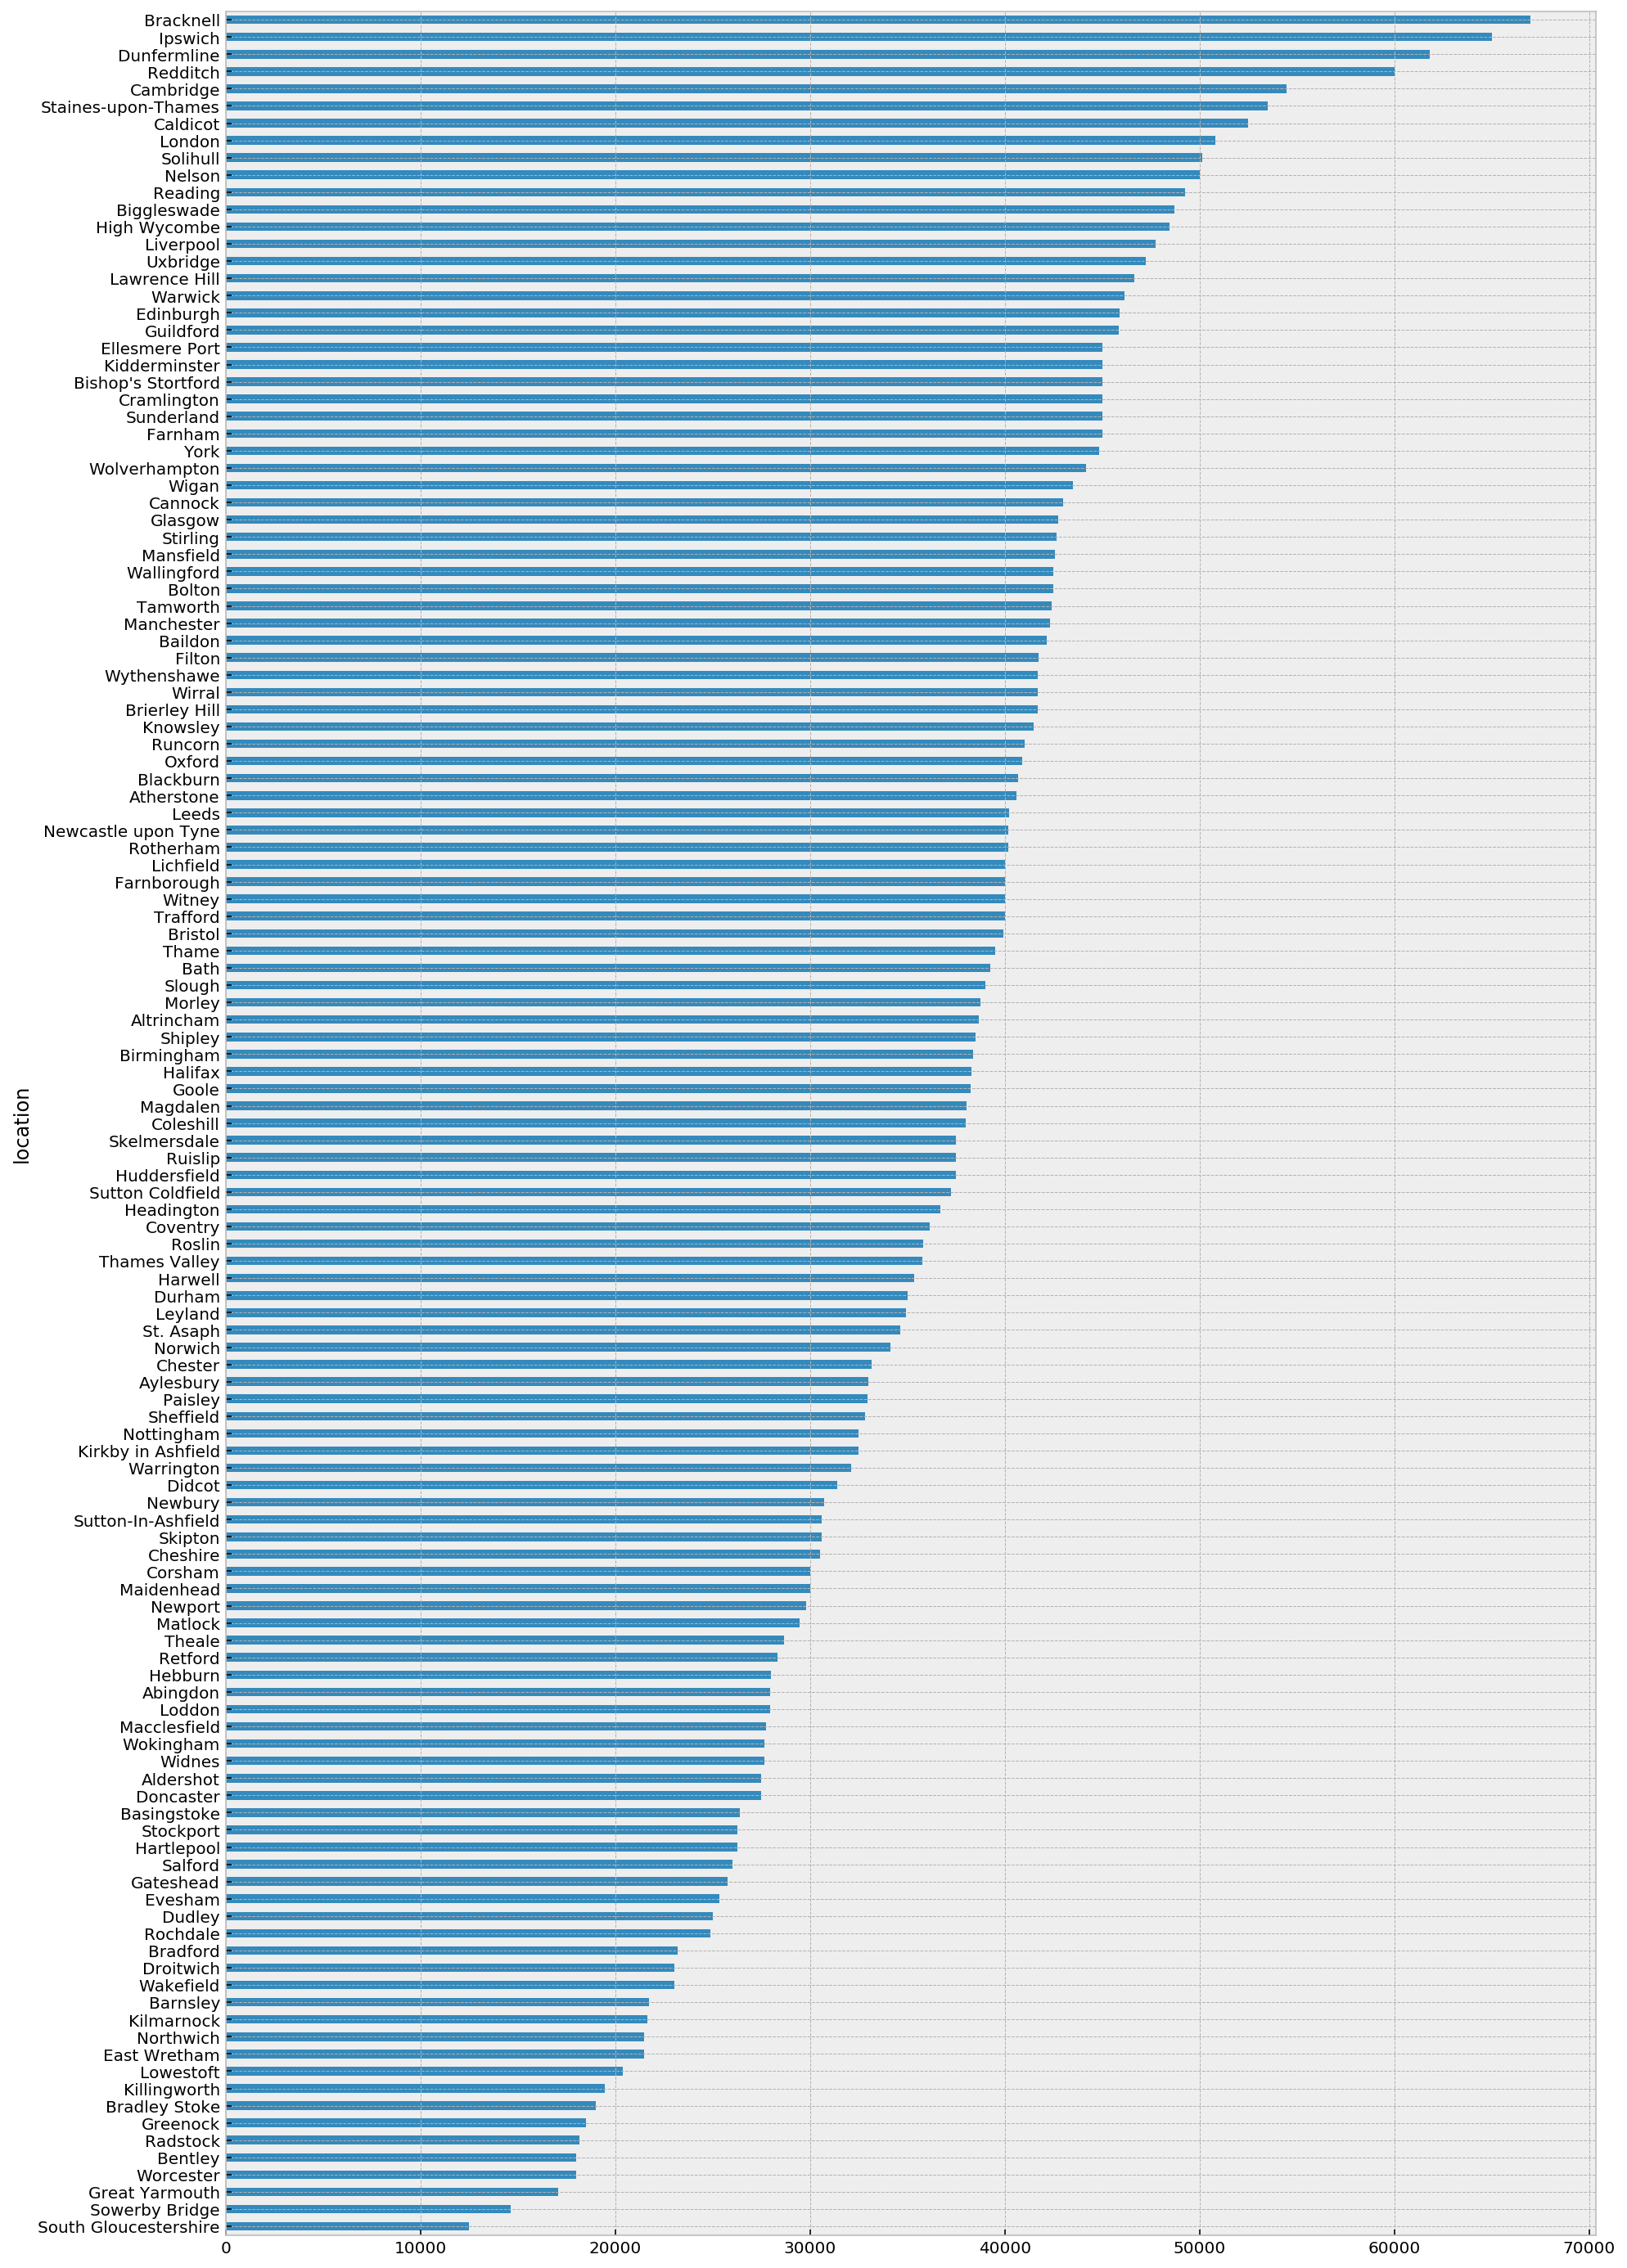

In [22]:
# Visualisation of Salary rate by city

df.groupby(by='location').salary_rate.mean().sort_values(ascending=True).plot(kind="barh", figsize=(15,25));
plt.show()

In [23]:
# Dummifying location (not company) - going to save as csv

df_dum = pd.get_dummies(df, columns=['location'], drop_first=True)
df_dum

job_title  \
0                   Power BI - Principal ICT Specialist   
1                      Senior Cost Intelligence Analyst   
4                                            BI Analyst   
5                                  Intelligence Officer   
6                   Manual Test Analyst - Systems + UAT   
...                                                 ...   
2046  Research Associate in Machine learning for lon...   
2047          Deep Learning Engineer (Machine Learning)   
2048                                     Data Scientist   
2055                           Computer Vision Engineer   
2058  Research Associate on Interpretable and Explai...   

                               company  \
0     West Midlands Combined Authority   
1                     Highways England   
4                               Spring   
5          Birmingham Children’s Trust   
6                                Modis   
...                                ...   
2046           University of Sheffield   
2047                     Drone Defence   
2048                  Heat Recruitment   
2055                   Archangel Group   
2058              University of Oxford   

                                                summary  \
0     Hours: 36.5 hours per week.\nAs of the 1st Jul...   
1     The role is based in the Cost Intelligence Gro...   
4     BI Analyst - Power BI - DAX - Data visualisati...   
5     You will be working with a wide range of stake...   
6     Manual Test Analyst - Systems + UAT.\nBrand ne...   
...                                                 ...   
2046  And practical experience handling data from lo...   
2047  Applying various data augmentation techniques ...   
2048  You will be a highly experienced data scientis...   
2055  We are looking to enhance the existing compute...   
2058  You will explore, generalise, and integrate de...   

                                           full_summary  salary_rate  \
0     Full time permanentHours of Work: 36.5 per wee...      41847.5   
1     Your new roleThe role is based in the Cost Int...      35637.0   
4     BI Analyst - Power BI - DAX - Data visualisati...      42500.0   
5     The Performance and Intelligence team in Birmi...      30399.0   
6     Manual Test Analyst - Systems + UATBrand new t...      45500.0   
...                                                 ...          ...   
2046  with high-dimensional molecular measurementsCo...      36094.0   
2047  Are you a Deep Learning Engineer experienced w...      30000.0   
2048  DATA SCIENCE / SENIOR DATA SCIENTIST / STATIST...      75000.0   
2055  Archangel Imaging is a startup transforming th...      30500.0   
2058  Department of Computer Science, Parks Road, Ox...      36569.5   

      location_Aldershot  location_Altrincham  location_Atherstone  \
0                      0                    0                    0   
1                      0                    0                    0   
4                      0                    0                    0   
5                      0                    0                    0   
6                      0                    0                    0   
...                  ...                  ...                  ...   
2046                   0                    0                    0   
2047                   0                    0                    0   
2048                   0                    0                    0   
2055                   0                    0                    0   
2058                   0                    0                    0   

      location_Aylesbury  location_Baildon  ...  location_Warwick  \
0                      0                 0  ...                 0   
1                      0                 0  ...                 0   
4                      0                 0  ...                 0   
5                      0                 0  ...                 0   
6                      0                 0  ...                 0   
...

In [24]:
# testing dummifying both location and company- going to save as csv

df_dum_2 = pd.get_dummies(df, columns=['location', 'company'], drop_first=True)
df_dum_2

job_title  \
0                   Power BI - Principal ICT Specialist   
1                      Senior Cost Intelligence Analyst   
4                                            BI Analyst   
5                                  Intelligence Officer   
6                   Manual Test Analyst - Systems + UAT   
...                                                 ...   
2046  Research Associate in Machine learning for lon...   
2047          Deep Learning Engineer (Machine Learning)   
2048                                     Data Scientist   
2055                           Computer Vision Engineer   
2058  Research Associate on Interpretable and Explai...   

                                                summary  \
0     Hours: 36.5 hours per week.\nAs of the 1st Jul...   
1     The role is based in the Cost Intelligence Gro...   
4     BI Analyst - Power BI - DAX - Data visualisati...   
5     You will be working with a wide range of stake...   
6     Manual Test Analyst - Systems + UAT.\nBrand ne...   
...                                                 ...   
2046  And practical experience handling data from lo...   
2047  Applying various data augmentation techniques ...   
2048  You will be a highly experienced data scientis...   
2055  We are looking to enhance the existing compute...   
2058  You will explore, generalise, and integrate de...   

                                           full_summary  salary_rate  \
0     Full time permanentHours of Work: 36.5 per wee...      41847.5   
1     Your new roleThe role is based in the Cost Int...      35637.0   
4     BI Analyst - Power BI - DAX - Data visualisati...      42500.0   
5     The Performance and Intelligence team in Birmi...      30399.0   
6     Manual Test Analyst - Systems + UATBrand new t...      45500.0   
...                                                 ...          ...   
2046  with high-dimensional molecular measurementsCo...      36094.0   
2047  Are you a Deep Learning Engineer experienced w...      30000.0   
2048  DATA SCIENCE / SENIOR DATA SCIENTIST / STATIST...      75000.0   
2055  Archangel Imaging is a startup transforming th...      30500.0   
2058  Department of Computer Science, Parks Road, Ox...      36569.5   

      location_Aldershot  location_Altrincham  location_Atherstone  \
0                      0                    0                    0   
1                      0                    0                    0   
4                      0                    0                    0   
5                      0                    0                    0   
6                      0                    0                    0   
...                  ...                  ...                  ...   
2046                   0                    0                    0   
2047                   0                    0                    0   
2048                   0                    0                    0   
2055                   0                    0                    0   
2058                   0                    0                    0   

      location_Aylesbury  location_Baildon  location_Barnsley  ...  \
0                      0                 0                  0  ...   
1                      0                 0                  0  ...   
4                      0                 0                  0  ...   
5                      0                 0                  0  ...   
6                      0                 0                  0  ...   
...                  ...               ...                ...  ...   
2046                   0                 0                  0  ...   
2047                   0                 0                  0  ...   
2048                   0                 0                  0  ...   
2055                   0                 0                  0  ...   
2058                   0                 0                  0  ...   

      company_Zebra Technical Recruitment  company_Zuse Talent Solutions  \
0    

### Save your results as a CSV

In [25]:
df_dum.to_csv("~/Desktop/GA_2/DSI13-project-submissions/Isabelle_Tontchev/indeed_df_dum_location.csv")

In [26]:
df_dum_2.to_csv("~/Desktop/GA_2/DSI13-project-submissions/Isabelle_Tontchev/indeed_df_dum_location&company.csv")

### Load in the the data of scraped salaries

In [27]:
df_dum = pd.read_csv("~/Desktop/GA_2/DSI13-project-submissions/Isabelle_Tontchev/indeed_df_dum_location.csv")

In [28]:
df_dum_2 = pd.read_csv("~/Desktop/GA_2/DSI13-project-submissions/Isabelle_Tontchev/indeed_df_dum_location&company.csv")

### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [29]:
# dummy columns save to csv
# create features stemming, job title. 
# pickling - save results of models
# Logistic regression first as is fast
# random forest dont optimise too many features, n estimators, max depth, min sample leaf
# use results for bestimator for decision in adaboost
# bagging/ ada boose

# key_skills = pd.DataFrame(columns=['Python', 'SQL', 'Machine Learning', 'Power BI', 'Tableau', 'Data Visualisation', 'AWS', 'Amazon Web Services', 'Hadoop', 'Spark'])

In [30]:
df.salary_rate.describe()

count       848.000000
mean      40575.848467
std       15606.856178
min       11934.000000
25%       30000.000000
50%       37750.000000
75%       47500.000000
max      175000.000000
Name: salary_rate, dtype: float64

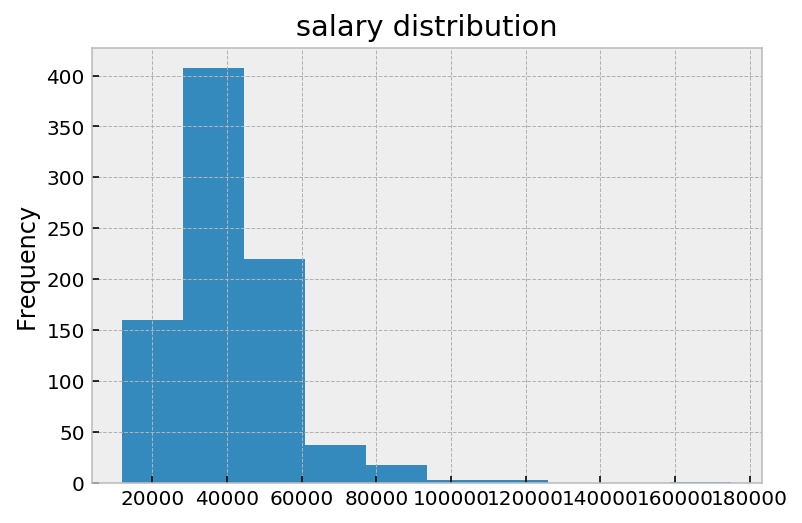

In [31]:
# Salary rate is not normally distributed. This is something to consider when classifying what is a high low salary.
df.salary_rate.plot.hist(bins=10, title='salary distribution')

In [32]:
# I am taking the 75% quartile as the cut off point at which high salary should be classified.
df['salary_band'] = df.salary_rate.map(lambda x: "low" if x <= df.salary_rate.quantile(0.75) else "high")
df[['salary_band']].head()

/Users/mymacbookpro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


salary_band
0         low
1         low
4         low
5         low
6         low

In [33]:
sectors = {"Government":["HM", "Office", "Department", "Ministry", "Government", "National"],
 "Education":["School", "College", "Education", "University"],"Health":["Medic", "Health"],"Royal":["Royal"],
 "Recruitment":["Recruitment", "McKinley"],"Finance":["Finance", "Bank"],"Energy":["Energy", "Gas"]}

In [34]:
categories = pd.DataFrame(columns=['Government','Education','Health','Royal','Recruitment','Finance','Energy'])

In [35]:
job_words = pd.DataFrame(columns=['Data Analyst', 'Data Scientist','Data Engineer','Business Intelligence', 'Python','Lead',
                                  'Intelligence','Machine Learning','Developer', 'R', 'BI', 'AI', 'Research', 'NLP', 
                                  'Deep', 'Artificial', 'Software', 'Building', 'Maintaining', 'Data', 'Analyst'])

In [36]:
job_titles = pd.DataFrame(columns=['Intern', 'Graduate', 'Junior', 'Manager', 'Head' ,'Senior', 
                                   'Expert', 'Lead'])

In [37]:
df = pd.concat([df, categories, job_words, job_titles], axis=1)

In [38]:
for key,value in sectors.items():
    df[key] = df['company'].map(lambda x: 1 if len(set(x.split()).intersection(set(value)))>0 else 0)

In [39]:
for job in job_words:
    df[job] = df['job_title'].map(lambda x: 1 if job in x else 0)

In [40]:
for jobby in job_titles:
    df[jobby] = df['full_summary'].map(lambda x: 1 if jobby in x else 0)

In [41]:
df.columns

Index(['job_title', 'company', 'location', 'summary', 'full_summary',
       'salary_rate', 'salary_band', 'Government', 'Education', 'Health',
       'Royal', 'Recruitment', 'Finance', 'Energy', 'Data Analyst',
       'Data Scientist', 'Data Engineer', 'Business Intelligence', 'Python',
       'Lead', 'Intelligence', 'Machine Learning', 'Developer', 'R', 'BI',
       'AI', 'Research', 'NLP', 'Deep', 'Artificial', 'Software', 'Building',
       'Maintaining', 'Data', 'Analyst', 'Intern', 'Graduate', 'Junior',
       'Manager', 'Head', 'Senior', 'Expert', 'Lead'],
      dtype='object')

In [42]:
df[['Education']]

Education
0             0
1             0
4             0
5             0
6             0
...         ...
2046          1
2047          0
2048          0
2055          0
2058          1

[848 rows x 1 columns]

In [43]:
df

job_title  \
0                   Power BI - Principal ICT Specialist   
1                      Senior Cost Intelligence Analyst   
4                                            BI Analyst   
5                                  Intelligence Officer   
6                   Manual Test Analyst - Systems + UAT   
...                                                 ...   
2046  Research Associate in Machine learning for lon...   
2047          Deep Learning Engineer (Machine Learning)   
2048                                     Data Scientist   
2055                           Computer Vision Engineer   
2058  Research Associate on Interpretable and Explai...   

                               company    location  \
0     West Midlands Combined Authority  Birmingham   
1                     Highways England  Birmingham   
4                               Spring  Birmingham   
5          Birmingham Children’s Trust  Birmingham   
6                                Modis  Birmingham   
...                                ...         ...   
2046           University of Sheffield   Sheffield   
2047                     Drone Defence     Retford   
2048                  Heat Recruitment      Oxford   
2055                   Archangel Group     Harwell   
2058              University of Oxford      Oxford   

                                                summary  \
0     Hours: 36.5 hours per week.\nAs of the 1st Jul...   
1     The role is based in the Cost Intelligence Gro...   
4     BI Analyst - Power BI - DAX - Data visualisati...   
5     You will be working with a wide range of stake...   
6     Manual Test Analyst - Systems + UAT.\nBrand ne...   
...                                                 ...   
2046  And practical experience handling data from lo...   
2047  Applying various data augmentation techniques ...   
2048  You will be a highly experienced data scientis...   
2055  We are looking to enhance the existing compute...   
2058  You will explore, generalise, and integrate de...   

                                           full_summary  salary_rate  \
0     Full time permanentHours of Work: 36.5 per wee...      41847.5   
1     Your new roleThe role is based in the Cost Int...      35637.0   
4     BI Analyst - Power BI - DAX - Data visualisati...      42500.0   
5     The Performance and Intelligence team in Birmi...      30399.0   
6     Manual Test Analyst - Systems + UATBrand new t...      45500.0   
...                                                 ...          ...   
2046  with high-dimensional molecular measurementsCo...      36094.0   
2047  Are you a Deep Learning Engineer experienced w...      30000.0   
2048  DATA SCIENCE / SENIOR DATA SCIENTIST / STATIST...      75000.0   
2055  Archangel Imaging is a startup transforming th...      30500.0   
2058  Department of Computer Science, Parks Road, Ox...      36569.5   

     salary_band  Government  Education  Health  ...  Data  Analyst  Intern  \
0            low           0          0       0  ...     0        0       0   
1            low           0          0       0  ...     0        1       0   
4            low           0          0       0  ...     0        1       0   
5            low           0          0       0  ...     0        0       0   
6            low           0          0       0  ...     0        1       1   
...          ...         ...        ...     ...  ...   ...      ...     ...   
2046         low           0          1       0  ...     0        0       0   
2047         low           0          0       0  ...     0        0       0   
2048        high           0          0       0  ...     1        0       0   
2055         low           0          0       0  ...     0        0       0   
2058         low           0          1       0  ...     0        0       0   

      Graduate  Junior  Manager  Head  Senior  Expert  Lead  
0            0       0        0     0       0       0     0  
1            0       0        0     0    

In [44]:
with pd.option_context('display.max_rows', None):
    display(round(df[['Government']].head(200),2))

Government
0             0
1             0
4             0
5             0
6             0
7             0
10            0
11            0
12            0
14            0
15            0
16            0
17            0
20            0
22            0
24            0
25            0
27            0
37            0
38            0
40            0
41            0
43            0
44            0
46            0
48            0
49            0
50            0
52            0
55            0
58            0
64            0
67            0
78            0
79            0
80            0
86            0
88            0
90            0
91            0
96            0
98            0
100           0
102           0
107           0
108           0
109           0
112           0
113           0
114           0
120           0
121           0
122           0
123           0
125           0
126           0
129           0
131           0
133           0
134           0
137           0
140           0
142           0
144           0
145           0
146           0
148           0
149           0
150           0
151           0
154           0
155           0
156           1
162           0
163           0
164           0
165           0
166           0
168           0
171           0
174           0
175           0
177           0
178           0
185           0
186           0
188           0
190           0
191           0
192           0
197           0
198           0
200           0
204           0
205           0
218           0
220           0
221           0
222           0
223           0
224           0
225           0
226           0
227           0
228           0
229           1
230           0
231           0
232           0
233           0
234           0
235           1
236           0
239           0
240           0
241           0
243           0
244           0
249           0
252           0
253           0
254           0
255           0
256           0
257           0
258           0
259           0
260           0
261           0
264           0
266           0
267           0
268           0
271           0
272           0
274           0
275           0
281           0
282           0
289           0
303           0
305           0
314           0
338           0
346           0
354           0
359           0
362           0
364           0
365           0
366           0
368           0
370           0
372           0
373           0
374           0
375           0
376           0
377           0
380           0
384           0
385           0
386           0
389           0
391           0
394           0
395           0
396           0
398           0
399           0
400           0
403           0
404           0
406           0
409           0
412           0
413           1
414           0
417           1
418           0
420           0
424           0
425           0
429           1
433           0
434           0
447           0
448           0
451           0
453           0
454           0
455           0
460           1
461           0
462           0
463           0
464           0
465           0
466           0
468           0

In [45]:
final_df = df.copy()

In [46]:
final_df

job_title  \
0                   Power BI - Principal ICT Specialist   
1                      Senior Cost Intelligence Analyst   
4                                            BI Analyst   
5                                  Intelligence Officer   
6                   Manual Test Analyst - Systems + UAT   
...                                                 ...   
2046  Research Associate in Machine learning for lon...   
2047          Deep Learning Engineer (Machine Learning)   
2048                                     Data Scientist   
2055                           Computer Vision Engineer   
2058  Research Associate on Interpretable and Explai...   

                               company    location  \
0     West Midlands Combined Authority  Birmingham   
1                     Highways England  Birmingham   
4                               Spring  Birmingham   
5          Birmingham Children’s Trust  Birmingham   
6                                Modis  Birmingham   
...                                ...         ...   
2046           University of Sheffield   Sheffield   
2047                     Drone Defence     Retford   
2048                  Heat Recruitment      Oxford   
2055                   Archangel Group     Harwell   
2058              University of Oxford      Oxford   

                                                summary  \
0     Hours: 36.5 hours per week.\nAs of the 1st Jul...   
1     The role is based in the Cost Intelligence Gro...   
4     BI Analyst - Power BI - DAX - Data visualisati...   
5     You will be working with a wide range of stake...   
6     Manual Test Analyst - Systems + UAT.\nBrand ne...   
...                                                 ...   
2046  And practical experience handling data from lo...   
2047  Applying various data augmentation techniques ...   
2048  You will be a highly experienced data scientis...   
2055  We are looking to enhance the existing compute...   
2058  You will explore, generalise, and integrate de...   

                                           full_summary  salary_rate  \
0     Full time permanentHours of Work: 36.5 per wee...      41847.5   
1     Your new roleThe role is based in the Cost Int...      35637.0   
4     BI Analyst - Power BI - DAX - Data visualisati...      42500.0   
5     The Performance and Intelligence team in Birmi...      30399.0   
6     Manual Test Analyst - Systems + UATBrand new t...      45500.0   
...                                                 ...          ...   
2046  with high-dimensional molecular measurementsCo...      36094.0   
2047  Are you a Deep Learning Engineer experienced w...      30000.0   
2048  DATA SCIENCE / SENIOR DATA SCIENTIST / STATIST...      75000.0   
2055  Archangel Imaging is a startup transforming th...      30500.0   
2058  Department of Computer Science, Parks Road, Ox...      36569.5   

     salary_band  Government  Education  Health  ...  Data  Analyst  Intern  \
0            low           0          0       0  ...     0        0       0   
1            low           0          0       0  ...     0        1       0   
4            low           0          0       0  ...     0        1       0   
5            low           0          0       0  ...     0        0       0   
6            low           0          0       0  ...     0        1       1   
...          ...         ...        ...     ...  ...   ...      ...     ...   
2046         low           0          1       0  ...     0        0       0   
2047         low           0          0       0  ...     0        0       0   
2048        high           0          0       0  ...     1        0       0   
2055         low           0          0       0  ...     0        0       0   
2058         low           0          1       0  ...     0        0       0   

      Graduate  Junior  Manager  Head  Senior  Expert  Lead  
0            0       0        0     0       0       0     0  
1            0       0        0     0    

In [47]:
final_df.job_title.unique()

array(['Power BI - Principal ICT Specialist',
       'Senior Cost Intelligence Analyst', 'BI Analyst',
       'Intelligence Officer', 'Manual Test Analyst - Systems + UAT',
       'Data Analyst', 'IT Business Analyst - Financial Services',
       'Graduate Finance Scheme', 'Marketing Analyst - Remote Working',
       'Business Intelligence Developer',
       'Senior BI Developer (ETL, DWH BUILD)',
       'MI Developer (SQL, SSRS, SSAS, QlikView)',
       'Data Engineer - Python', 'Database Developer / DBA',
       'SAS Developer / Consultant', 'MI Manager', 'Senior Data Engineer',
       'Data Analyst / Scientist', 'Retail Data Manager',
       'MS SQL DBA/Database Administrator',
       'Commercial Analyst - Liverpool', 'Commercial Finance Analyst',
       'Data Insight Analyst (SQL, BI, Tableau)',
       'Portfolio and Assurance Analyst', 'Senior Information Analyst',
       'Healthcare Data Analyst (Using Excel and Tableau)',
       'Senior BI Analyst- Business Objects',
       'IT 

#### Thought experiment: What is the baseline accuracy for this model?

In [48]:
print("Baseline Accuracy:",final_df.salary_band.value_counts().max()/sum(final_df.salary_band.value_counts()))

Baseline Accuracy: 0.7629716981132075


## Preliminary EDA

### Create a classification model to predict High/Low salary. 


- Start by ONLY using the location as a feature.
- Use at least two different classifiers you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.
- Create a few new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value?
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models.
- Discuss model coefficients or feature importances as applicable.

In [82]:
# dummy columns save to csv
# create features stemming, job title. 
# pickling - save results of models
# Logistic regression first as is fast
# random forest dont optimise too many features, n estimators, max depth, min sample leaf
# use results for bestimator for decision in adaboost
# bagging/ ada boost

In [358]:
X = final_df['location']
y = final_df['salary_band']

In [359]:
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [360]:
lr = LogisticRegression(solver='liblinear', penalty='l1', max_iter=100000)

lr.fit(X_train, y_train)

print('Train score: ', lr.score(X_train, y_train))
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
print('CV scores:', cv_scores)
print('CV mean:', np.mean(cv_scores))
print('Test score:', lr.score(X_test, y_test))


lr.coef_
lr.intercept_

Train score:  0.7772861356932154
CV scores: [0.72794118 0.72058824 0.74264706 0.74074074 0.65925926]
CV mean: 0.718235294117647
Test score: 0.7823529411764706


array([1.51113292])

> As predicted the model hasn't performed that well and is as good, if slightly better than the baseline prediction of 0.76. But then I am only predicting using one feature: Location. The cross val score splits the data into 5 folds which is essentially a resampling procedure used to evaluate machine learning models on a limited data sample.

## Adding new variable to predictors in Logistic Regression Model

> Adding more variables to the predictors...

> I am dummifying Location, as it is the only variable that makes sense to dummify. Since I only search a few regions on the UK, this should help the model to identify which regions are associated amongst other variables with a high/ low salary.

> I decided to remove job title from the predictors since the job titles were convoluted and in some cases it required a lot of cleaning and possibly applying NLP through lemmatization/ stemming to extract key words such as 'scien' for science in data science. Instead, I subset and feature engineered columns to include keys words and job titles that appear in the full summary. 

In [57]:
predictor_df = final_df.copy()

In [58]:
predictor_df.drop(['company', 'job_title', 'summary', 'full_summary', 'salary_rate'], axis=1, inplace=True)
X = pd.get_dummies(predictor_df, columns=['location'], drop_first=True)
y = X.pop('salary_band')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [363]:
lr = LogisticRegression(solver='liblinear', max_iter=100000)

lr.fit(X_train, y_train)

print('Train score: ', lr.score(X_train, y_train))
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
print('CV scores:', cv_scores)
print('CV mean:', np.mean(cv_scores))
print('Test score:', lr.score(X_test, y_test))


lr.coef_
lr.intercept_

Train score:  0.8525073746312685
CV scores: [0.70588235 0.70588235 0.78676471 0.80740741 0.73333333]
CV mean: 0.7478540305010893
Test score: 0.8058823529411765


array([2.03817381])

> The scores are slightly better than the logistic regression with one predictor. 

##### Logistic Regression CV... to tune for the best regularization strength

In [364]:
# increase the default number of iteration steps to reach convergence
lrcv = LogisticRegressionCV(penalty='l2', max_iter=100000, cv=5)
lrcv.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [365]:
# accuracy score
print('Train score: ', lrcv.score(X_train, y_train))
cv_scores = cross_val_score(lrcv, X_train, y_train)
print('CV scores:', cv_scores)
print('CV mean:', np.mean(cv_scores))
print('Test score:', lrcv.score(X_test, y_test))

Train score:  0.8451327433628318
CV scores: [0.76470588 0.77205882 0.80882353 0.83703704 0.8       ]
CV mean: 0.7965250544662309
Test score: 0.8058823529411765


> Tried logistic regression CV and received about the same results as I did before. In this model the key features associated with a higher salary are those with 'Analyst', jobs in Education, jobs in Government, jobs in Basingstoke, jobs in research and jobs with Data, then Manager, Junior. I'm surprised that Data Science didn't make it higher up the list.

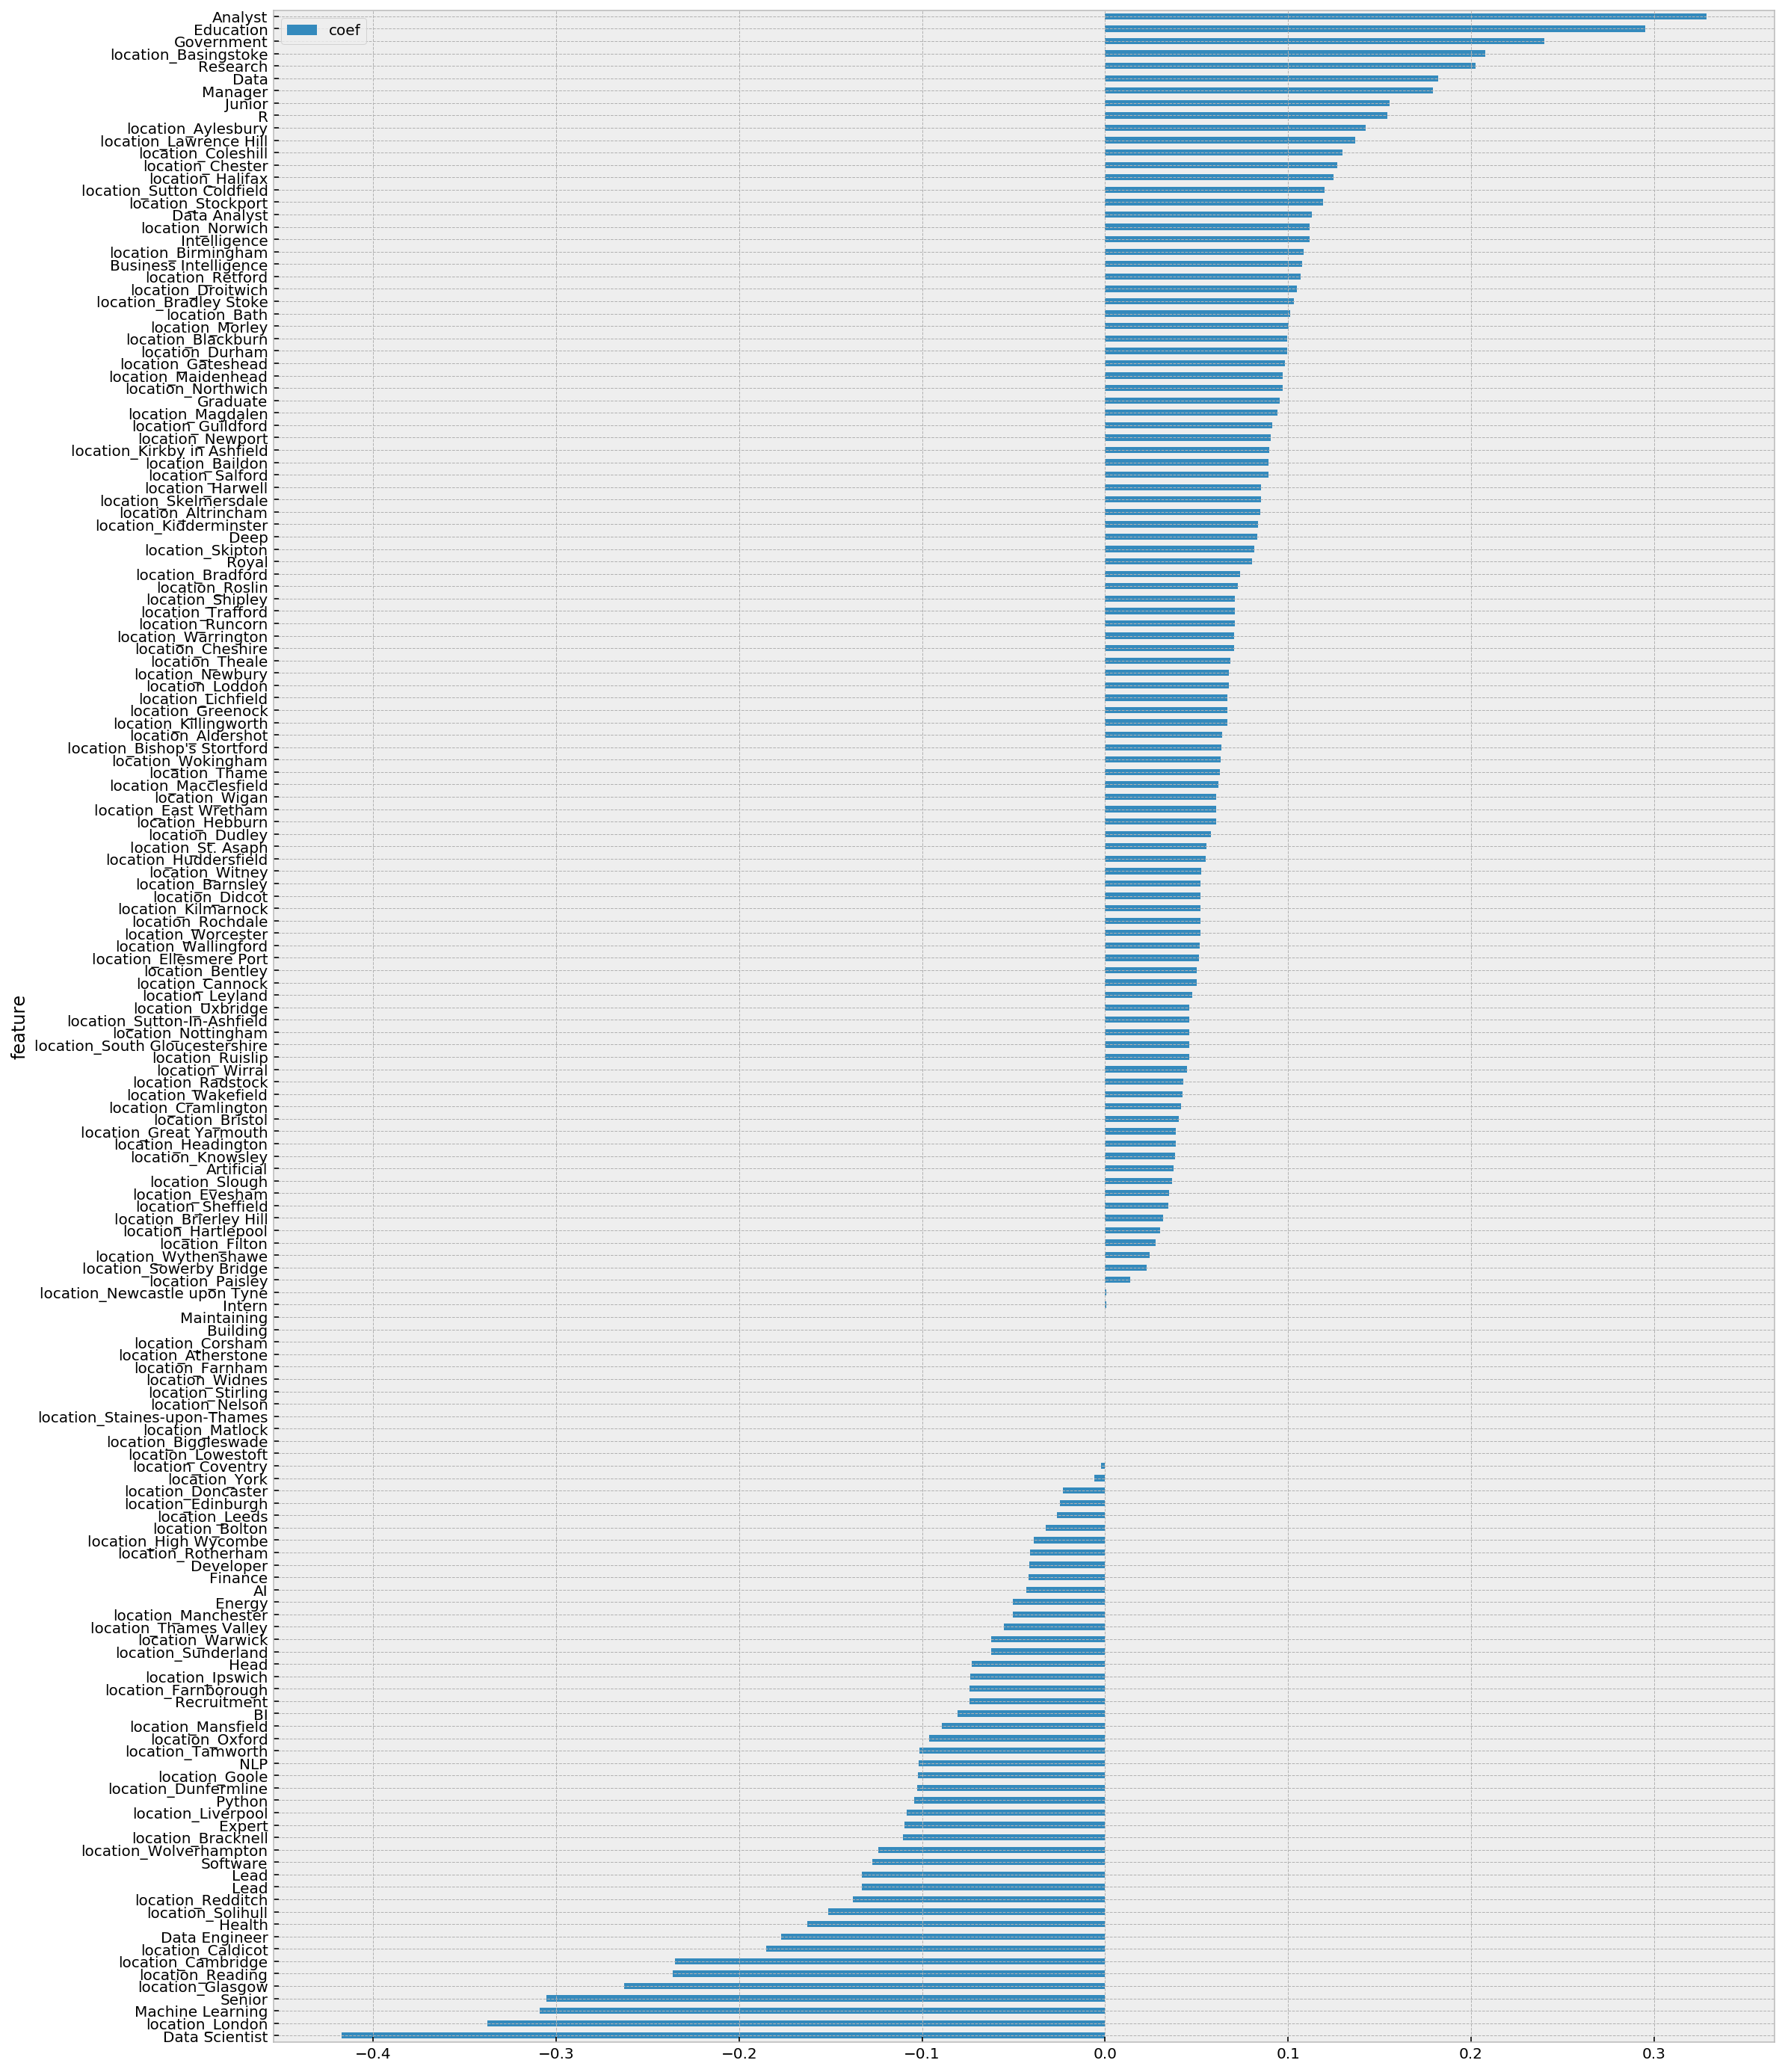

In [366]:
pd.DataFrame(list(zip(X.columns, lrcv.coef_[0])), 
             columns=['feature', 'coef'])\
    .sort_values(by='coef') \
    .plot(kind='barh', x='feature', y='coef', figsize=(18, 25))
plt.show()

In [367]:
list(lr.get_params().keys())

['C',
 'class_weight',
 'dual',
 'fit_intercept',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'random_state',
 'solver',
 'tol',
 'verbose',
 'warm_start']

In [368]:
params = {'C':np.logspace(-4,4,100),
          'penalty':['l1','l2', 'elasticnet'],
          'max_iter': [100000], 'solver': ['liblinear']}
lrgs = GridSearchCV(lr,params,verbose=1,cv=5,n_jobs=2, return_train_score=True)
lrgs.fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 300 tasks      | elapsed:    4.3s
[Parallel(n_jobs=2)]: Done 1126 tasks      | elapsed:   46.4s
[Parallel(n_jobs=2)]: Done 1396 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=2,
             param_grid={'C': array([1.00000000e-04...
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
       

In [196]:
from joblib import dump, load

In [344]:
dump(lrgs, 'lrgs_indeed.joblib') 
lrgs = load('lrgs_indeed.joblib') 

In [345]:
print('Best Params:')
print(lrgs.best_params_)
print('Best estimator C:')
print(lrgs.best_estimator_.C)
print('Best estimator mean CV training score:')
print(lrgs.best_score_)
print('Best estimator score on training set:')
print(lrgs.score(X_train, y_train))
print('Best estimator score on test set:')
print(lrgs.score(X_test, y_test))

Best Params:
{'C': 0.1707352647470692, 'max_iter': 100000, 'penalty': 'l1', 'solver': 'liblinear'}
Best estimator C:
0.1707352647470692
Best estimator mean CV training score:
0.7950326797385621
Best estimator score on training set:
0.8392330383480826
Best estimator score on test set:
0.8


> The best C is the alpah that provides the regularization strength which aims at diminishing the effect of variables that do not correlate to high or low salary through cross validation.

> In this example the hyperparameter tuning does a better job at identifying the features that associate with salary band. In this case, Data Scientist, London, Senior, Analyst and Machine Learning all those that I expected to make it in are at the top of the list.

In [211]:
coefficient_df = pd.DataFrame()
coefficient_df['Features'] = X_train.columns
coefficient_df['LR_Coefficients'] = lrgs.best_estimator_.coef_[0]
coefficient_df['absolutes'] = abs(lrgs.best_estimator_.coef_[0])

In [212]:
coefficient_df.sort_values(by='absolutes',ascending=False).head(10)

Features  LR_Coefficients  absolutes
8        Data Scientist        -0.472783   0.472783
102     location_London        -0.388317   0.388317
33               Senior        -0.361943   0.361943
27              Analyst         0.353384   0.353384
14     Machine Learning        -0.346310   0.346310
1             Education         0.328104   0.328104
78     location_Glasgow        -0.311722   0.311722
121    location_Reading        -0.267575   0.267575
56   location_Cambridge        -0.257850   0.257850
55    location_Caldicot        -0.192540   0.192540

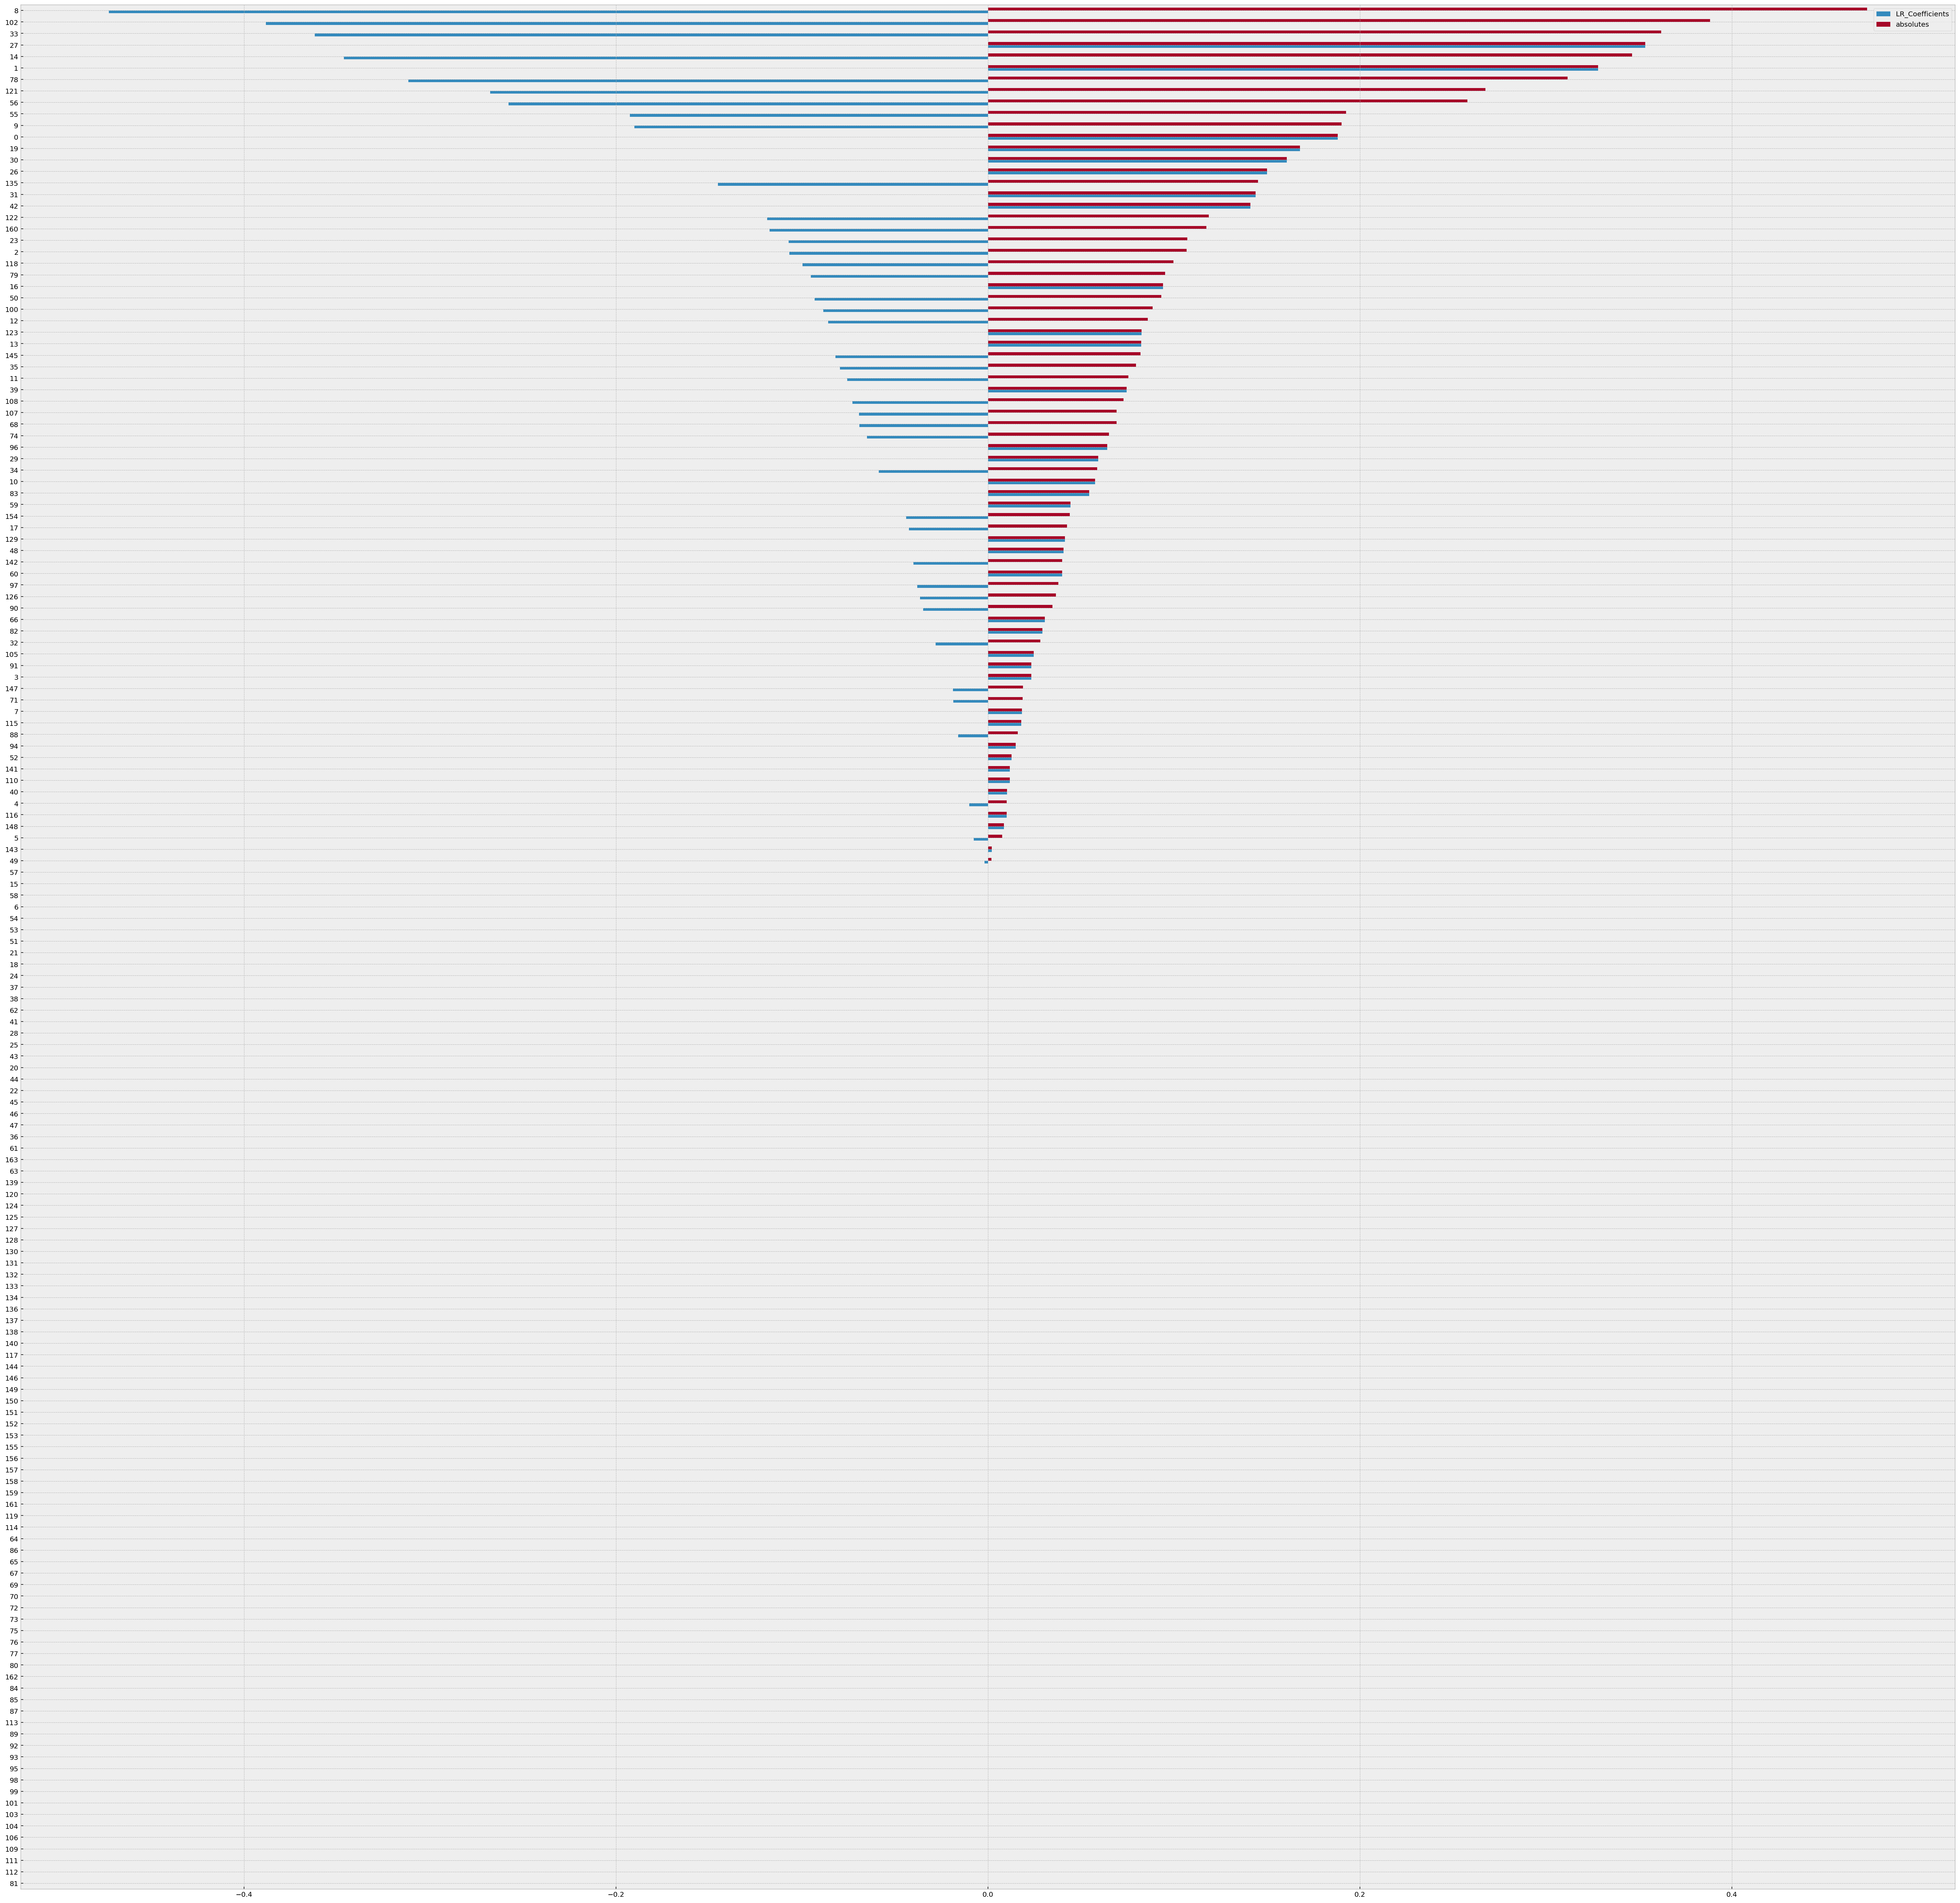

In [213]:
coefficient_df.sort_values(by='absolutes', ascending=True).plot(kind='barh', figsize=(50,50));

In [105]:
pd.DataFrame(lrgs.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time     param_C  \
0         0.009844      0.001042         0.003927        0.001802      0.0001   
1         0.010419      0.000923         0.006381        0.003062      0.0001   
2         0.002869      0.000198         0.000000        0.000000      0.0001   
3         0.008643      0.000500         0.003232        0.001765  0.00012045   
4         0.010674      0.000780         0.002885        0.000753  0.00012045   
..             ...           ...              ...             ...         ...   
295       0.148077      0.018832         0.002231        0.000347     8302.18   
296       0.002692      0.000418         0.000000        0.000000     8302.18   
297       1.281834      0.621625         0.001792        0.000362       10000   
298       0.157157      0.027702         0.002175        0.000117       10000   
299       0.002315      0.000438         0.000000        0.000000       10000   

    param_max_iter param_penalty param_solver  \
0           100000            l1    liblinear   
1           100000            l2    liblinear   
2           100000    elasticnet    liblinear   
3           100000            l1    liblinear   
4           100000            l2    liblinear   
..             ...           ...          ...   
295         100000            l2    liblinear   
296         100000    elasticnet    liblinear   
297         100000            l1    liblinear   
298         100000            l2    liblinear   
299         100000    elasticnet    liblinear   

                                                params  split0_test_score  \
0    {'C': 0.0001, 'max_iter': 100000, 'penalty': '...           0.235294   
1    {'C': 0.0001, 'max_iter': 100000, 'penalty': '...           0.750000   
2    {'C': 0.0001, 'max_iter': 100000, 'penalty': '...                NaN   
3    {'C': 0.00012045035402587823, 'max_iter': 1000...           0.235294   
4    {'C': 0.00012045035402587823, 'max_iter': 1000...           0.750000   
..                                                 ...                ...   
295  {'C': 8302.175681319752, 'max_iter': 100000, '...           0.735294   
296  {'C': 8302.175681319752, 'max_iter': 100000, '...                NaN   
297  {'C': 10000.0, 'max_iter': 100000, 'penalty': ...           0.661765   
298  {'C': 10000.0, 'max_iter': 100000, 'penalty': ...           0.735294   
299  {'C': 10000.0, 'max_iter': 100000, 'penalty': ...                NaN   

     ...  mean_test_score  std_test_score  rank_test_score  \
0    ...         0.237462        0.002707              178   
1    ...         0.725610        0.023159              166   
2    ...              NaN             NaN              246   
3    ...         0.237462        0.002707              178   
4    ...         0.725610        0.023159              166   
..   ...              ...             ...              ...   
295  ...         0.769978        0.032041               65   
296  ...              NaN             NaN              205   
297  ...         0.702168        0.040103              174   
298  ...         0.769978        0.032041               65   
299  ...              NaN             NaN              300   

     split0_train_score  split1_train_score  split2_train_score  \
0              0.238007            0.238007            0.236162   
1              0.806273            0.826568            0.808118   
2                   NaN                 NaN                 NaN   
3              0.238007            0.238007            0.236162   
4              0.806273            0.826568            0.808118   
..                  ...                 ...                 ...   
295            0.863469            0.880074            0.845018   
296                 NaN                 NaN                 NaN   
297            0.863469            0.880074            0.845018   
298            0.863469            0.880074            0.845018   
299                 NaN             

### Classification Report, Confusion Matrix, ROC curve and precision-recall curve for best_logreg model

In [369]:
lrgs_predictions_train = lrgs.predict(X_train)
lrgs_predictions_test = lrgs.predict(X_test)

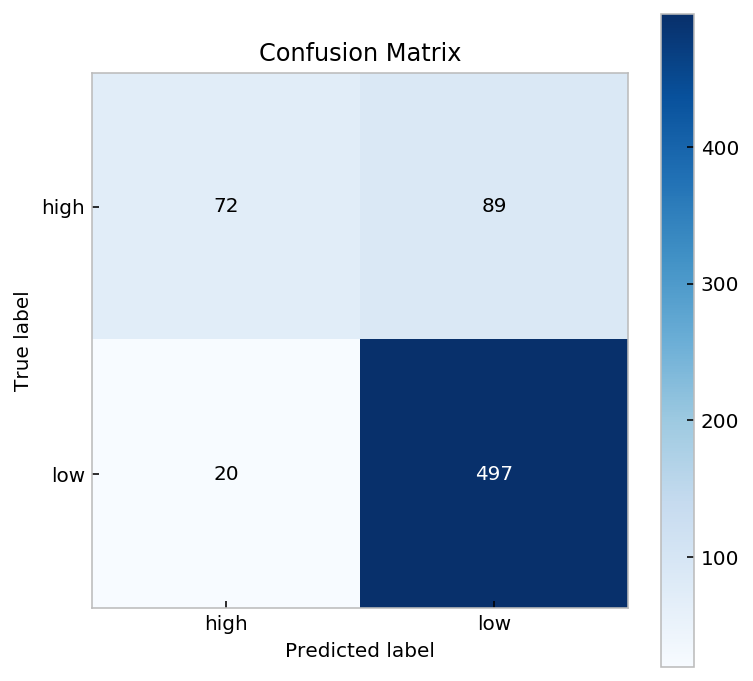

In [370]:
skplt.metrics.plot_confusion_matrix(y_train, lrgs_predictions_train, figsize=(6,6))
plt.show()

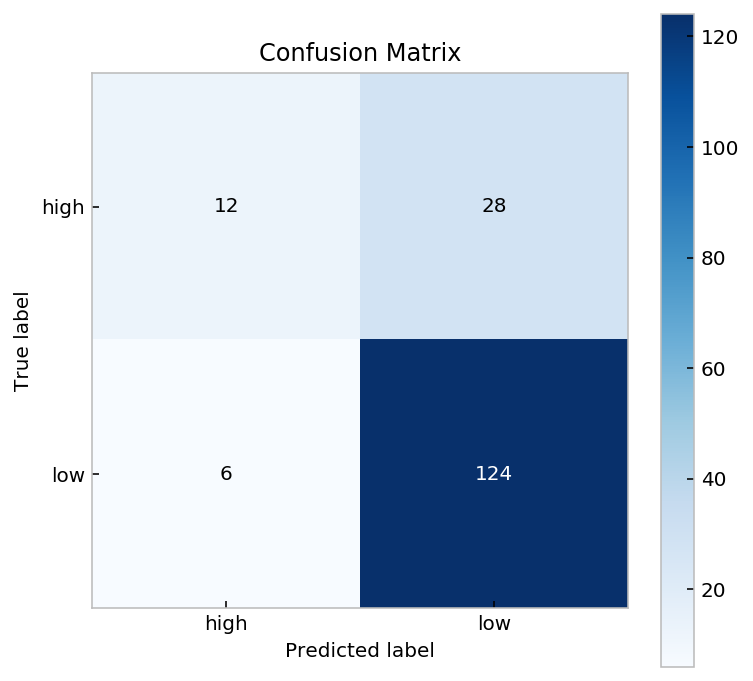

In [371]:
skplt.metrics.plot_confusion_matrix(y_test, lrgs_predictions_test, figsize=(6, 6))
plt.show()

In [372]:
print(classification_report(y_train, lrgs_predictions_train))

              precision    recall  f1-score   support

        high       0.78      0.45      0.57       161
         low       0.85      0.96      0.90       517

    accuracy                           0.84       678
   macro avg       0.82      0.70      0.74       678
weighted avg       0.83      0.84      0.82       678



In [373]:
print(classification_report(y_test, lrgs_predictions_test))

              precision    recall  f1-score   support

        high       0.67      0.30      0.41        40
         low       0.82      0.95      0.88       130

    accuracy                           0.80       170
   macro avg       0.74      0.63      0.65       170
weighted avg       0.78      0.80      0.77       170



> Accuracy is high on both the train and test classification report where it is 84% and 80%, respectively. This is a measure of the True Positive and True Negative over the total observations and as this score is high and is above the baseline I can take this as indication that the model is classifying the majority of the results correctly. The only flag here is that is the recall score for high salary on both the train and test and the preicion score for the high salary is low or below the baseline score. The precision and recall are both summarised in the F1 score. So let me start with the former, since precision is a measure of the False Positive rate which is less of a problem than the False Negative (in the recall). The False Positive rate that the linear regression grid search is classifying low salary as high salary. Whereas the recall is indicating poor result as it is classifying a larger proportion of high salary as low salary. This may be becuase the sample size is small where the train consists of 80% of the total of 848 and the test consists of 20% of the total of 848. For high results I would consider getting some more data but also perhap performing some more modelling and possibly using NLP and stemming and lemmatization to retrieve keys word in the document although myfor loop does a good job of this I am not sure how accurate it is.

###### Precision-recall and ROC curve on Logistic Regression Grid Search

In [374]:
lrgs_probabilities_train = lrgs.predict_proba(X_train)
lrgs_probabilities_test = lrgs.predict_proba(X_test)

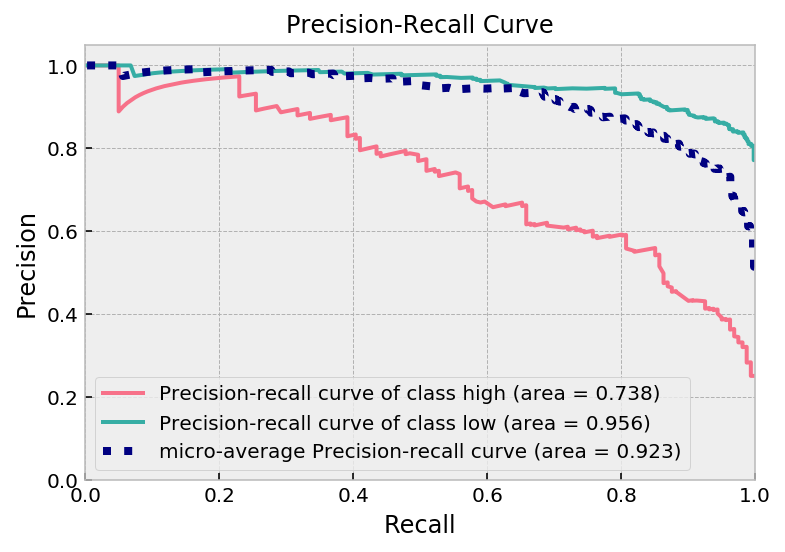

In [375]:
# As with the above you can see that the precision
cmap = ListedColormap(sns.color_palette("husl", len(lrgs.classes_)))
skplt.metrics.plot_precision_recall(y_train, lrgs_probabilities_train, cmap=cmap)
plt.show()

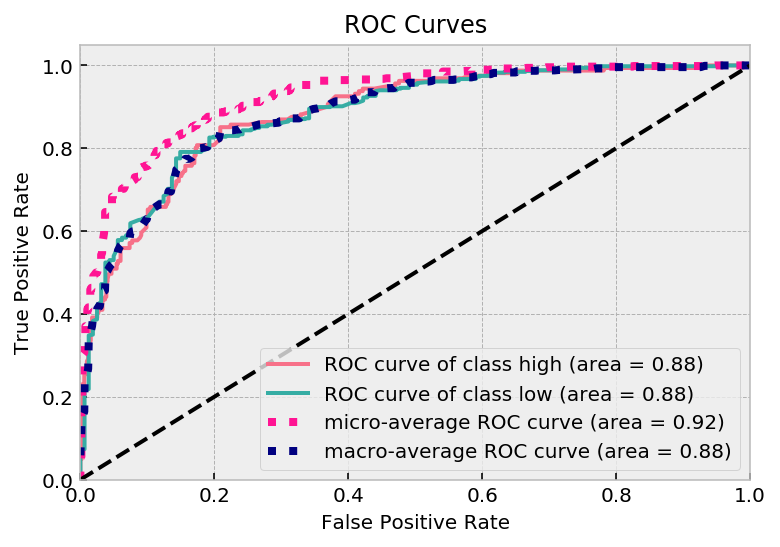

In [376]:
skplt.metrics.plot_roc(y_train, lrgs_probabilities_train, cmap=cmap)
plt.show()

> ROC curves are frequently used to show in a graphical way the connection/trade-off between clinical sensitivity and specificity for every possible cut-off for a test or a combination of tests. In addition the area under the ROC curve gives an idea about the benefit of using the test(s) in question. Since the ROC curve line for high and low class are above the beaseline, which is the black dotted line. I can say that the model for lrgs performed relatively well. This confirms the result form the classification report that identifies a high true positive rate, where the correct classification is reported the majority.

In [59]:
# this dataframe looks at the y true label and y predictions to identify 
# where prediction correctly made and as we can see it had issues identifying 
# between high and low.

predictions = best_lr.predict(X_test)
predictions_df = pd.DataFrame()
predictions_df['y_true'] = y_test
predictions_df['y_hat'] = predictions
predictions_df['prob_1'] = best_lr.predict_proba(X_test)[:,1]
predictions_df['70_percent_threshold'] = predictions_df['prob_1'].map(lambda x: 1 if x>0.7 else 0)
predictions_df.head(10)

NameError: name 'best_lr' is not defined

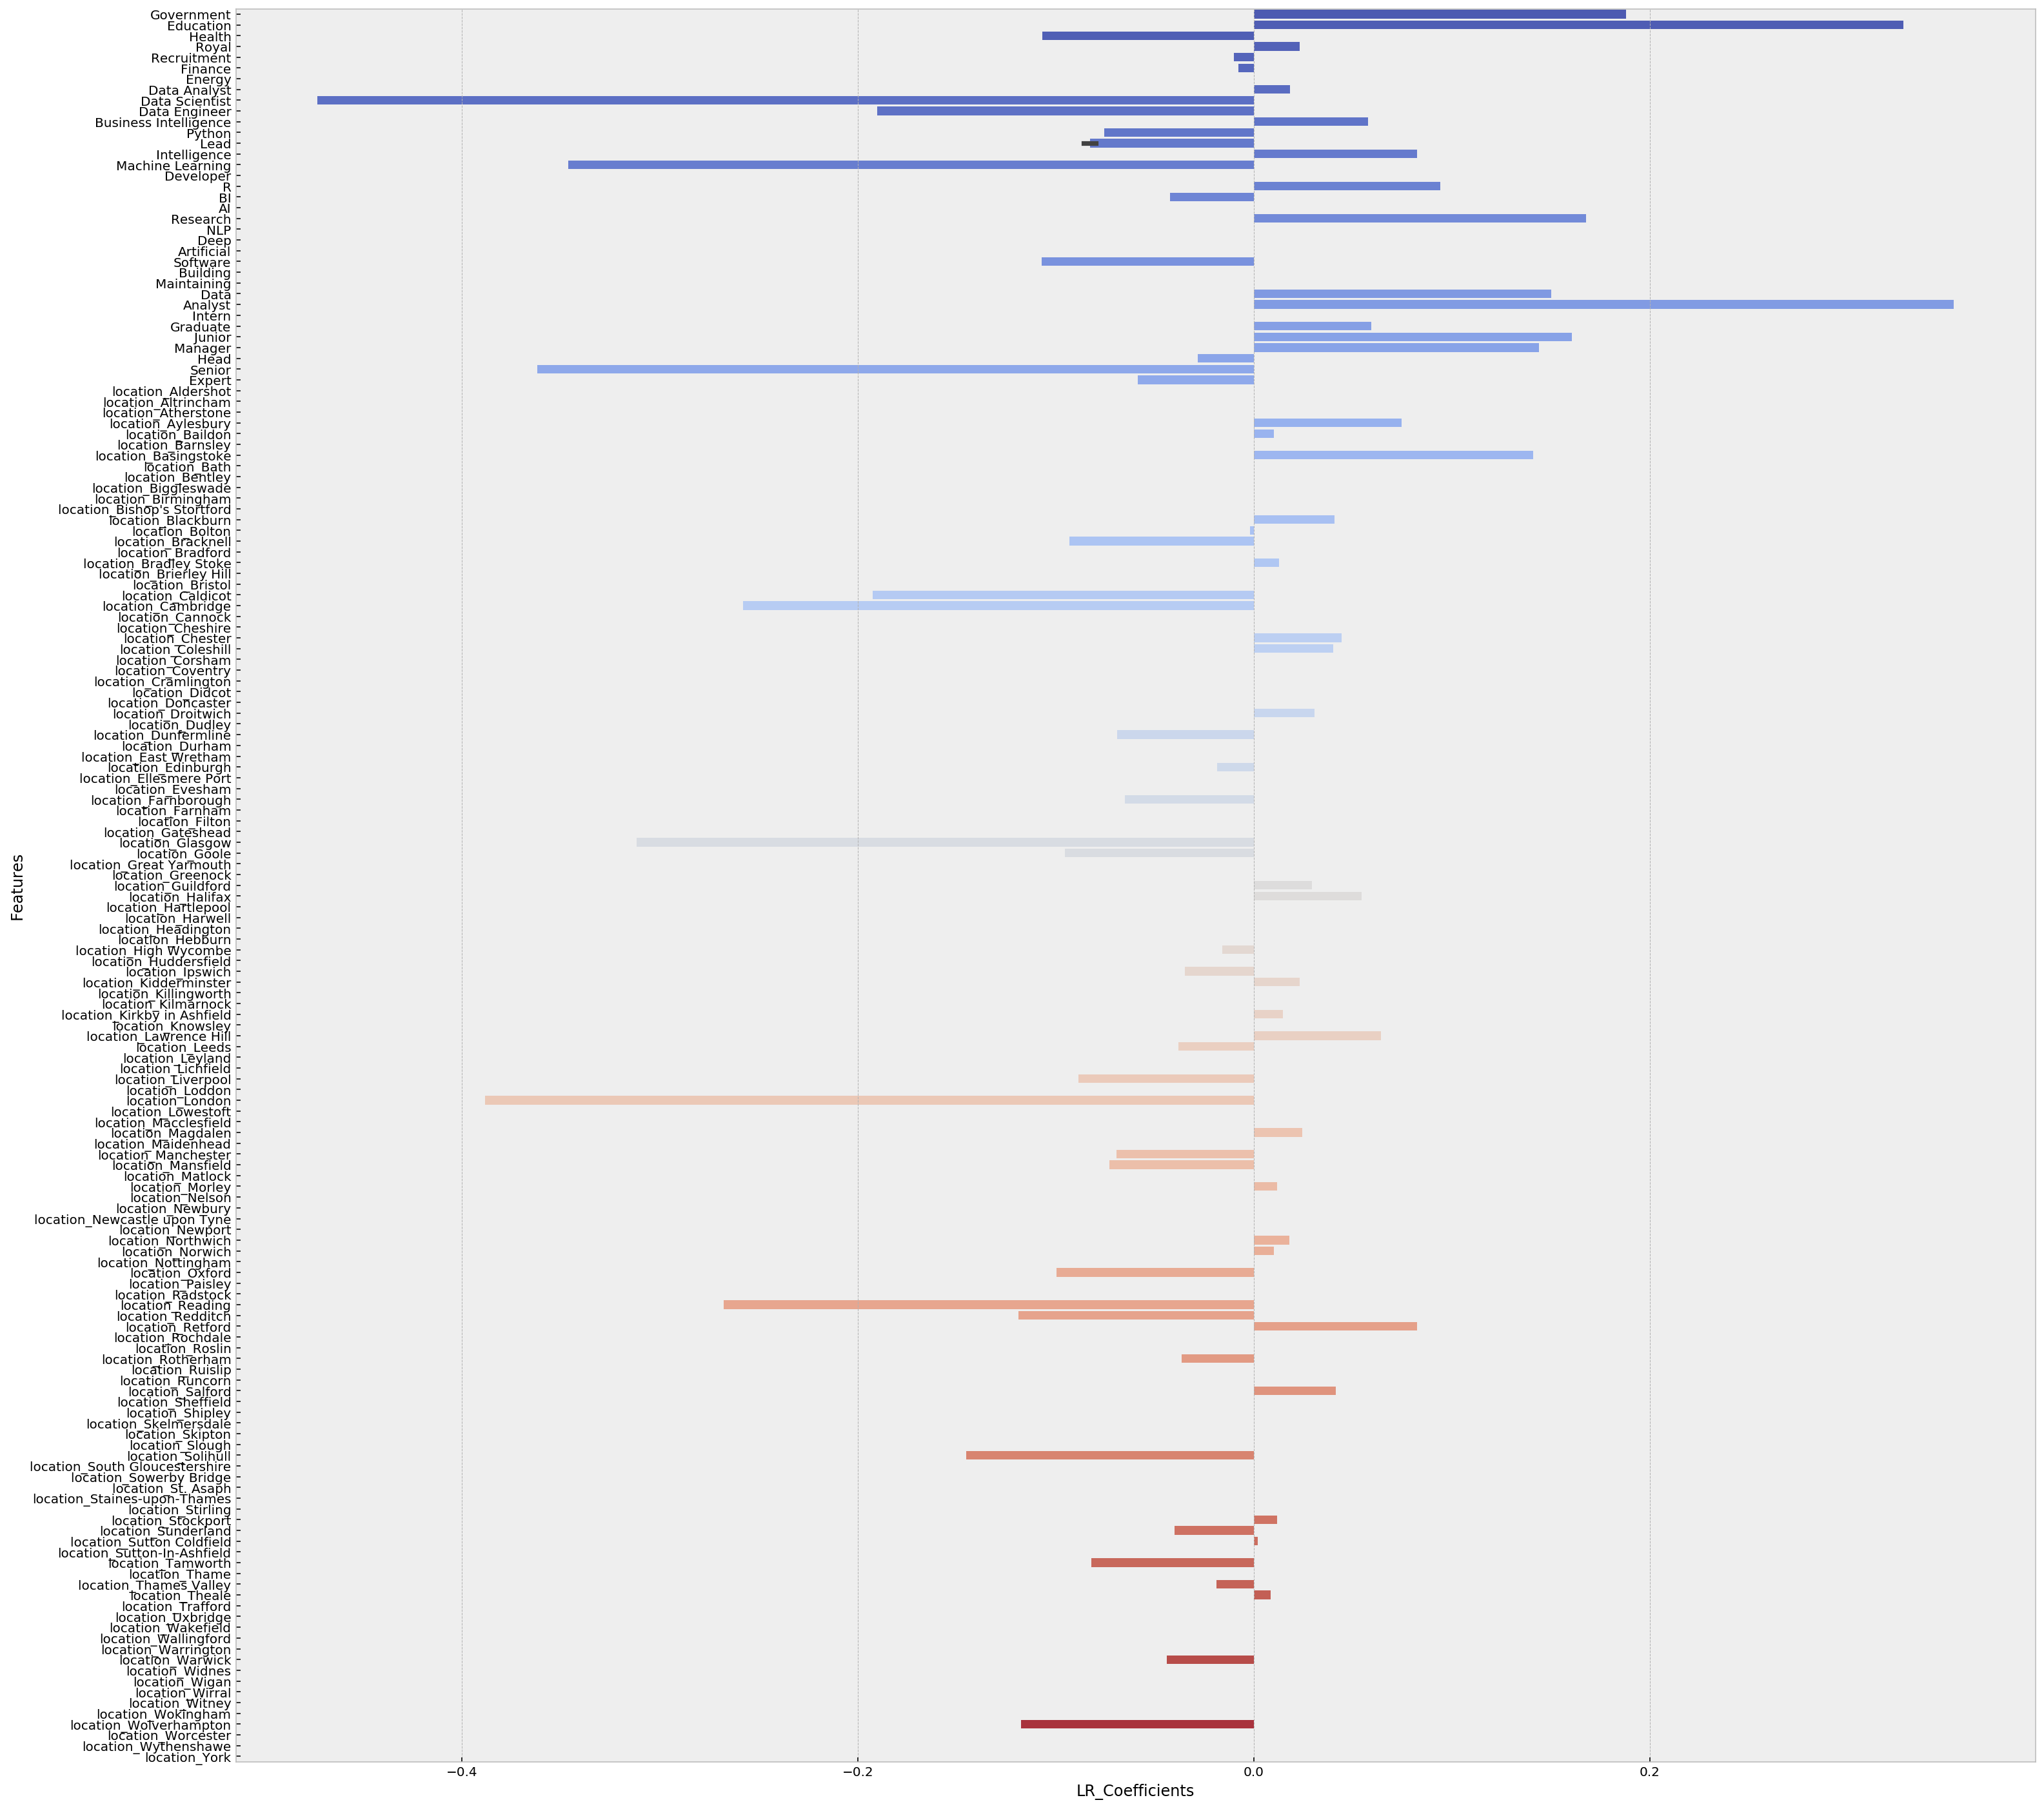

In [378]:
fig,ax= plt.subplots(figsize=(25,25))
sns.barplot(y=coefficient_df.Features,x=coefficient_df.LR_Coefficients, orient='h', palette='coolwarm',ax=ax);

## Testing with Random Forest Classifier

In [ ]:
# dummy columns save to csv
# create features stemming, job title. 
# pickling - save results of models
# Logistic regression first as is fast
# random forest dont optimise too many features, n estimators, max depth, min sample leaf
# use results for bestimator for decision in adaboost
# bagging/ ada boost

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [47]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [216]:
params = {'max_depth':range(1, 21),
          'max_features':["auto","log2",0.5], 
          'min_samples_leaf': [5, 10, 15], 
          'criterion':['gini'],
          'bootstrap':[True, False], 
          'n_estimators': [10, 200, 20]
         }
rfgs = GridSearchCV(rfc, params, verbose=1, cv=5, n_jobs=2)
rfgs.fit(X_train,y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.1s
[Parallel(n_jobs=2)]: Done 340 tasks      | elapsed:   30.3s
[Parallel(n_jobs=2)]: Done 840 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 1540 tasks      | elapsed:  2.3min
[Parallel(n_jobs=2)]: Done 2440 tasks      | elapsed:  3.6min
[Parallel(n_jobs=2)]: Done 3540 tasks      | elapsed:  4.9min
[Parallel(n_jobs=2)]: Done 4840 tasks      | elapsed:  6.7min
[Parallel(n_jobs=2)]: Done 5400 out of 5400 | elapsed:  7.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [217]:
print('Best Parameters:')
print(rfgs.best_params_)
print('Best estimator mean cross validated training score:')
print(rfgs.best_score_)
print('Best estimator score on the full training set:')
print(rfgs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(rfgs.score(X_test, y_test))

Best Parameters:
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 0.5, 'min_samples_leaf': 5, 'n_estimators': 20}
Best estimator mean cross validated training score:
0.8097385620915034
Best estimator score on the full training set:
0.8185840707964602
Best estimator score on the test set:
0.7941176470588235


In [220]:
dump(rfgs, 'rfgs_indeed.joblib') 
rfgs = load('rfgs_indeed.joblib') 

In [58]:
rfgs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [221]:
rf_coefficient_df = pd.DataFrame()
rf_coefficient_df['Features'] = X_train.columns
rf_coefficient_df['Feature_Importances'] = rfgs.best_estimator_.feature_importances_

In [222]:
rf_coefficient_df.sort_values(by='Feature_Importances',ascending=False).head(10)

Features  Feature_Importances
8      Data Scientist             0.237565
33             Senior             0.081489
14   Machine Learning             0.075025
102   location_London             0.072257
27            Analyst             0.059371
1           Education             0.050156
78   location_Glasgow             0.041092
16                  R             0.040306
26               Data             0.037241
9       Data Engineer             0.032763

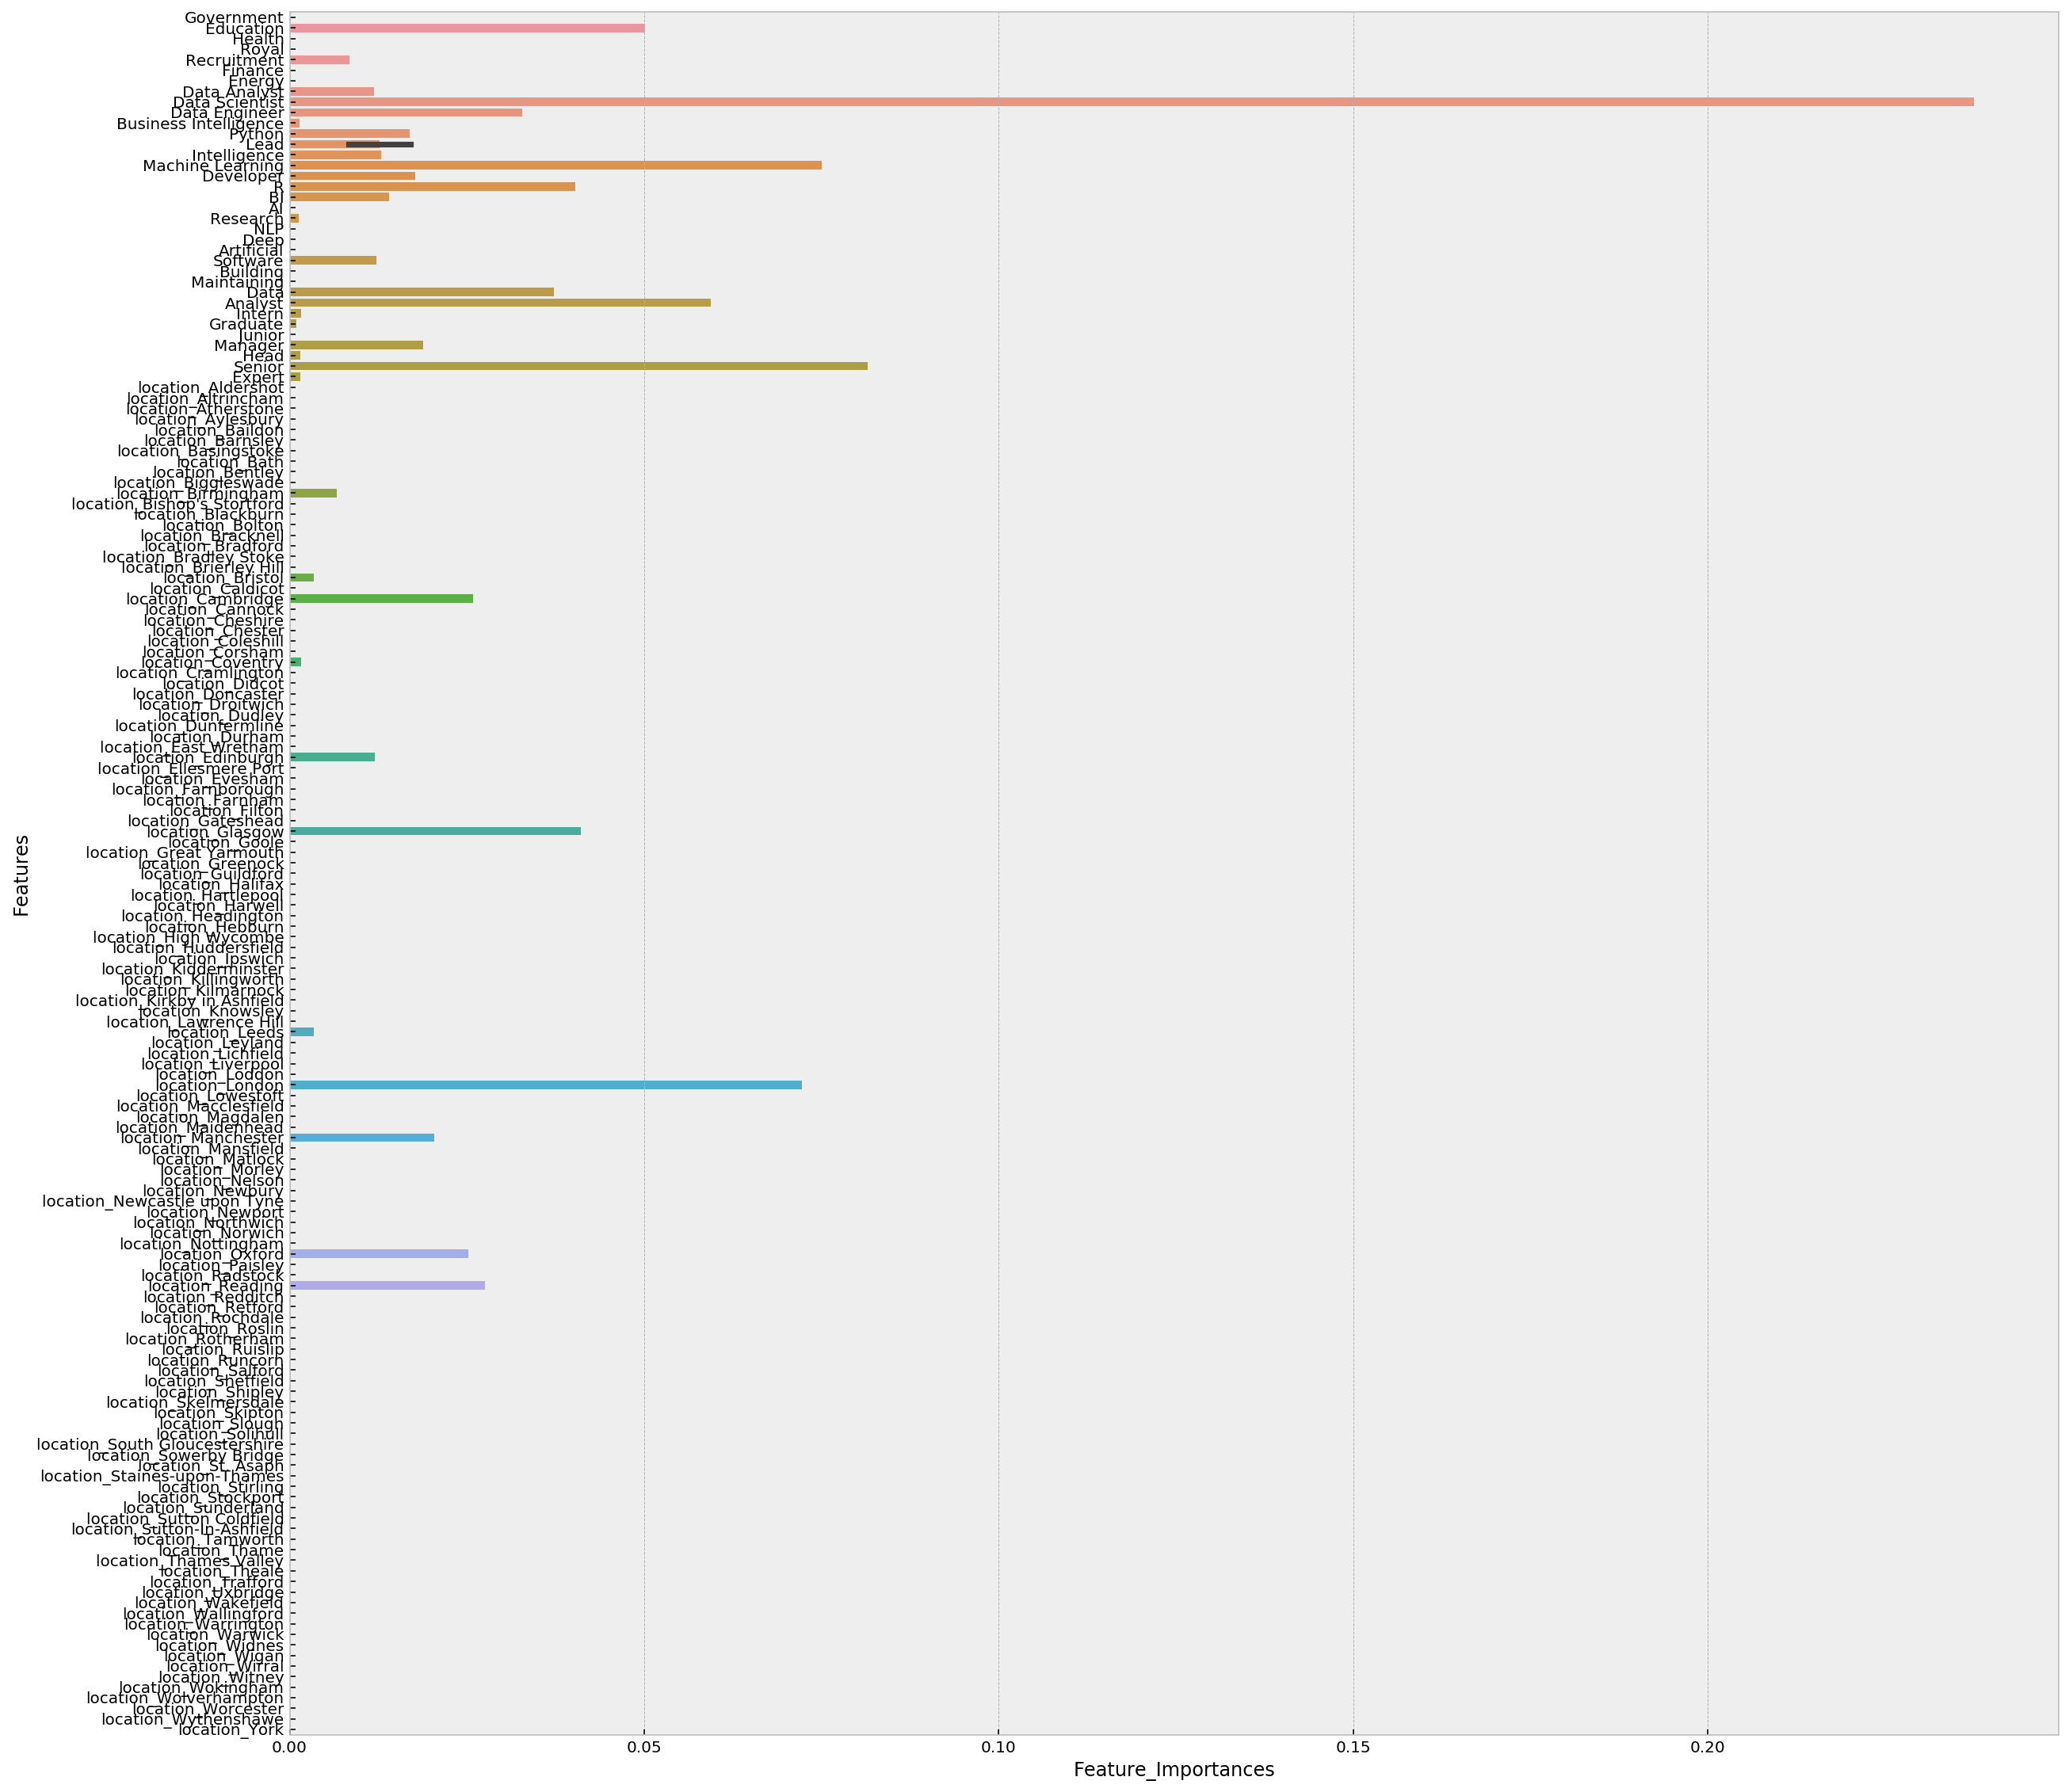

In [223]:
fig,ax= plt.subplots(figsize=(20,20))
sns.barplot(y=rf_coefficient_df.Features,x=rf_coefficient_df.Feature_Importances, orient='h',ax=ax);

In [225]:
predictions_train = rfgs.predict(X_train)
predictions_test = rfgs.predict(X_test)

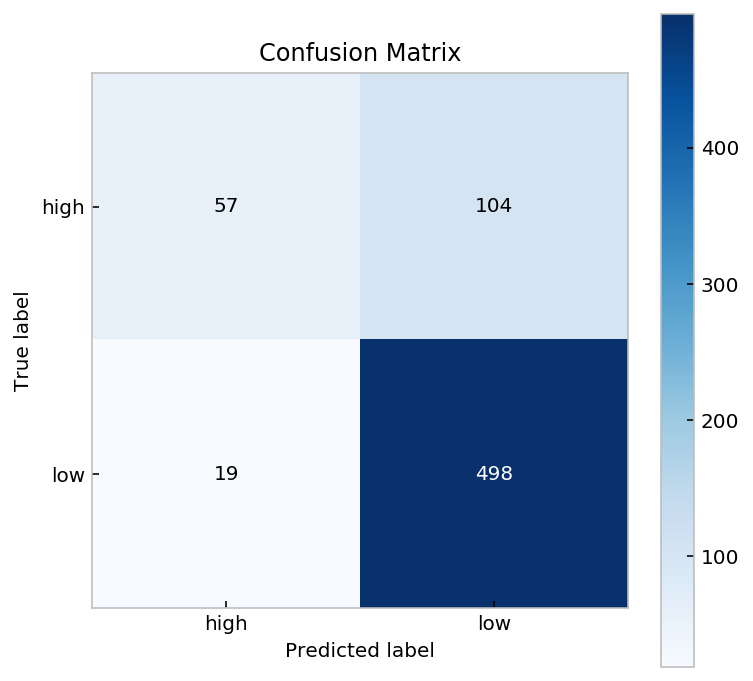

In [226]:
skplt.metrics.plot_confusion_matrix(y_train, predictions_train, figsize=(6,6))
plt.show()

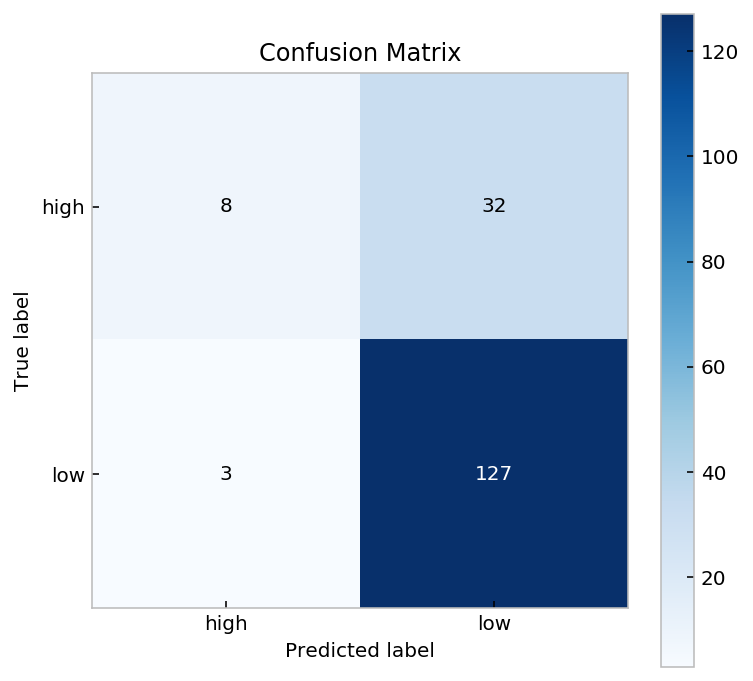

In [227]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_test, figsize=(6, 6))
plt.show()

In [228]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

        high       0.75      0.35      0.48       161
         low       0.83      0.96      0.89       517

    accuracy                           0.82       678
   macro avg       0.79      0.66      0.69       678
weighted avg       0.81      0.82      0.79       678



In [229]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

        high       0.73      0.20      0.31        40
         low       0.80      0.98      0.88       130

    accuracy                           0.79       170
   macro avg       0.76      0.59      0.60       170
weighted avg       0.78      0.79      0.75       170



In [230]:
probabilities_train = rfgs.predict_proba(X_train)
probabilities_test = rfgs.predict_proba(X_test)

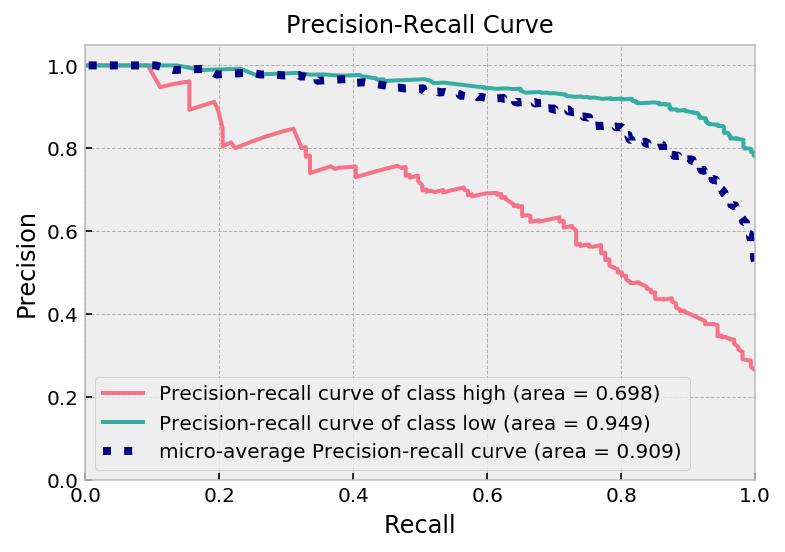

In [231]:
cmap = ListedColormap(sns.color_palette("husl", len(lrgs.classes_)))
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap)
plt.show()

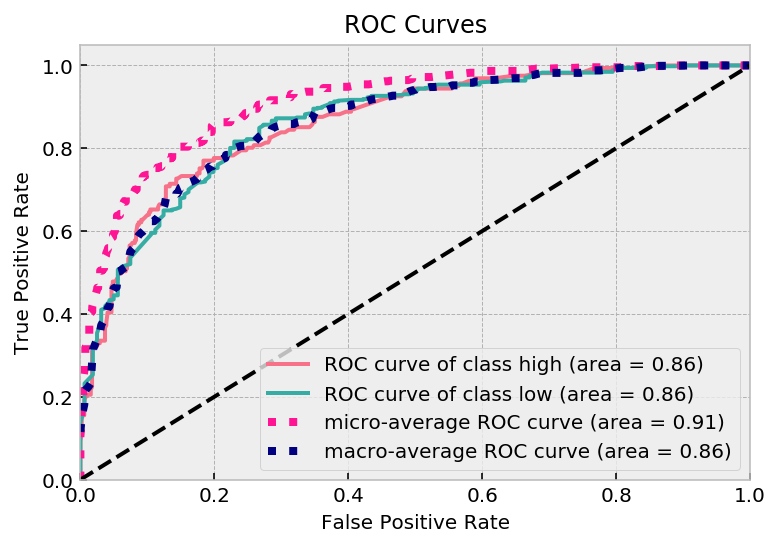

In [232]:
skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap)
plt.show()

In [235]:
predictions = rfgs.best_estimator_.predict(X_test)
predictions_df = pd.DataFrame()
predictions_df['y_true'] = y_test
predictions_df['y_hat'] = predictions
predictions_df['prob_1'] = rfgs.best_estimator_.predict_proba(X_test)[:,1]
predictions_df['70_percent_threshold'] = predictions_df['prob_1'].map(lambda x: 1 if x>0.7 else 0)
predictions_df.head(10)

y_true y_hat    prob_1  70_percent_threshold
1647   high   low  0.637641                     0
478     low   low  0.766571                     1
148     low   low  0.732177                     1
107     low   low  0.878105                     1
1871    low  high  0.385500                     0
86      low   low  0.876900                     1
1616   high   low  0.733231                     1
1703    low   low  0.788789                     1
1720    low   low  0.576246                     0
1341    low   low  0.868683                     1

### Decision Tree Classifier

> The decision tree classifier actually returns the best scores from all the models. I did run 41k fits on it and even though the sample size of data was small (848 in total: 679 train and 169 for test the test score is quite high comparable to the train score meaning that the model would generalise well on unseen data.

In [52]:
dtc = DecisionTreeClassifier()

dtc_params = {'criterion': ['gini'], 'max_depth': [None]+list(range(1, 5)), 
              'max_features': range(1, X_train.shape[1]+1),
              'min_samples_split': [2, 10],
              'ccp_alpha': [0, 0.0001, 0.001, 0.005, 0.01]}

dtc_gridsearch = GridSearchCV(dtc, dtc_params, n_jobs=2, cv=5, verbose=1, return_train_score=True)

NameError: name 'X_train' is not defined

In [245]:
dtc_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 8200 candidates, totalling 41000 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 330 tasks      | elapsed:    3.5s
[Parallel(n_jobs=2)]: Done 2730 tasks      | elapsed:   17.2s
[Parallel(n_jobs=2)]: Done 6730 tasks      | elapsed:   37.9s
[Parallel(n_jobs=2)]: Done 12330 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 19530 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 28330 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done 38730 tasks      | elapsed:  3.4min
[Parallel(n_jobs=2)]: Done 41000 out of 41000 | elapsed:  3.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=2,
             param_grid={'ccp_alpha': [0, 0.0001, 0.001, 0.005, 0.01],
          

In [246]:
print('Best Parameters:')
print(dtc_gridsearch.best_params_)
print('Best estimator mean cross validated training score:')
print(dtc_gridsearch.best_score_)
print('Best estimator score on the full training set:')
print(dtc_gridsearch.score(X_train, y_train))
print('Best estimator score on the test set:')
print(dtc_gridsearch.score(X_test, y_test))

Best Parameters:
{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': None, 'max_features': 30, 'min_samples_split': 2}
Best estimator mean cross validated training score:
0.8185403050108931
Best estimator score on the full training set:
0.9336283185840708
Best estimator score on the test set:
0.8470588235294118


In [53]:
dump(dtc_gridsearch, 'dtcgs_indeed.joblib') 
dtcgs = load('dtcgs_indeed.joblib') 

NameError: name 'dtc_gridsearch' is not defined

In [249]:
dtc_gridsearch.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='gini',
                       max_depth=None, max_features=30, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [250]:
rf_coefficient_df = pd.DataFrame()
rf_coefficient_df['Features'] = X_train.columns
rf_coefficient_df['Feature_Importances'] = dtc_gridsearch.best_estimator_.feature_importances_

In [251]:
rf_coefficient_df.sort_values(by='Feature_Importances',ascending=False).head(10)

Features  Feature_Importances
8      Data Scientist             0.090060
1           Education             0.048193
14   Machine Learning             0.041182
102   location_London             0.040712
31            Manager             0.037938
33             Senior             0.037424
16                  R             0.033277
7        Data Analyst             0.031527
26               Data             0.030969
27            Analyst             0.026572

In [252]:
predictions_train = dtc_gridsearch.predict(X_train)
predictions_test = dtc_gridsearch.predict(X_test)

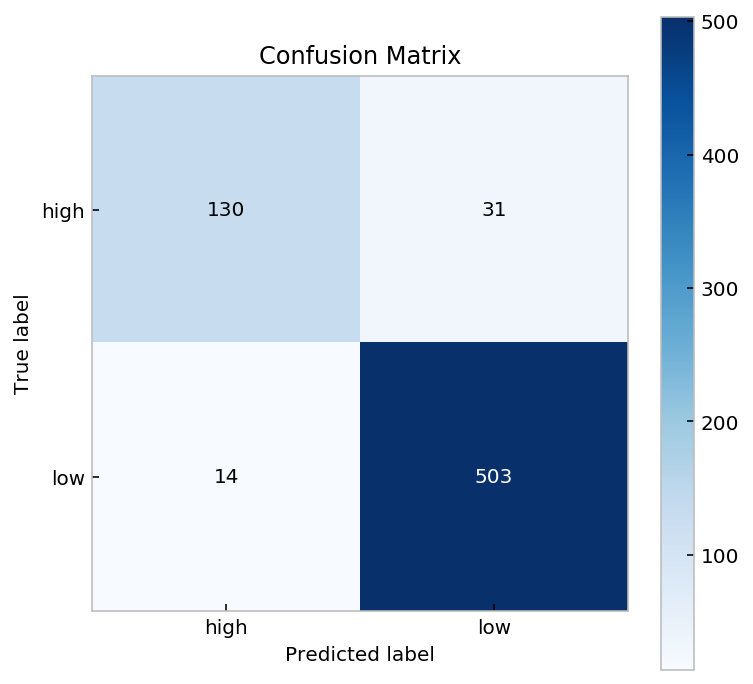

In [253]:
skplt.metrics.plot_confusion_matrix(y_train, predictions_train, figsize=(6,6))
plt.show()

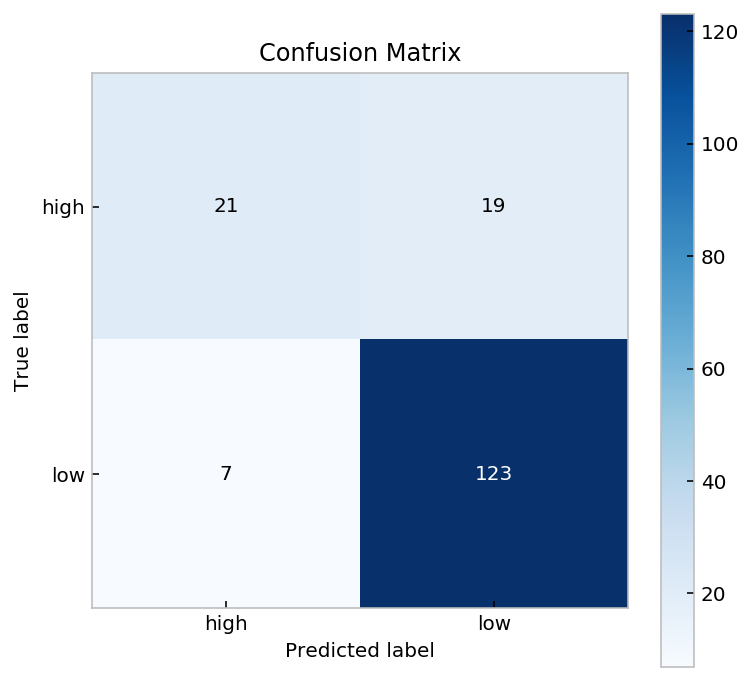

In [254]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_test, figsize=(6, 6))
plt.show()

In [255]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

        high       0.90      0.81      0.85       161
         low       0.94      0.97      0.96       517

    accuracy                           0.93       678
   macro avg       0.92      0.89      0.90       678
weighted avg       0.93      0.93      0.93       678



In [256]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

        high       0.75      0.53      0.62        40
         low       0.87      0.95      0.90       130

    accuracy                           0.85       170
   macro avg       0.81      0.74      0.76       170
weighted avg       0.84      0.85      0.84       170



In [260]:
probabilities_train = dtc_gridsearch.predict_proba(X_train)
probabilities_test = dtc_gridsearch.predict_proba(X_test)

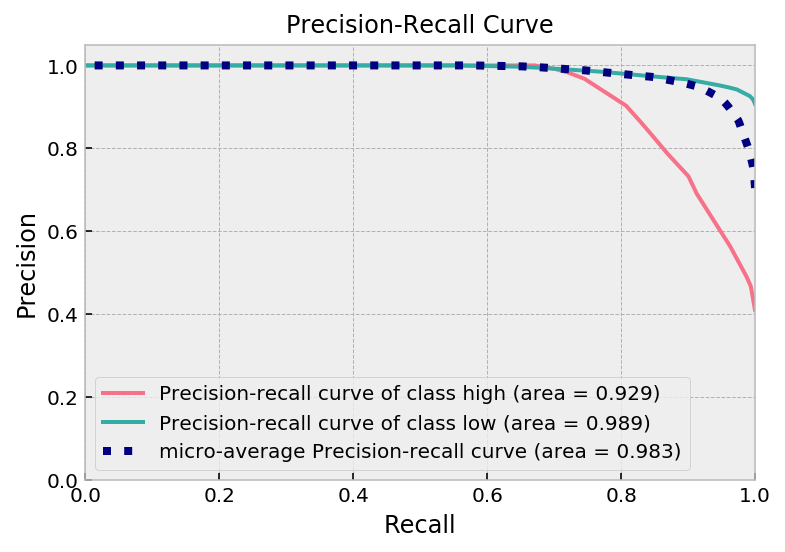

In [261]:
cmap = ListedColormap(sns.color_palette("husl", len(lrgs.classes_)))
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap)
plt.show()

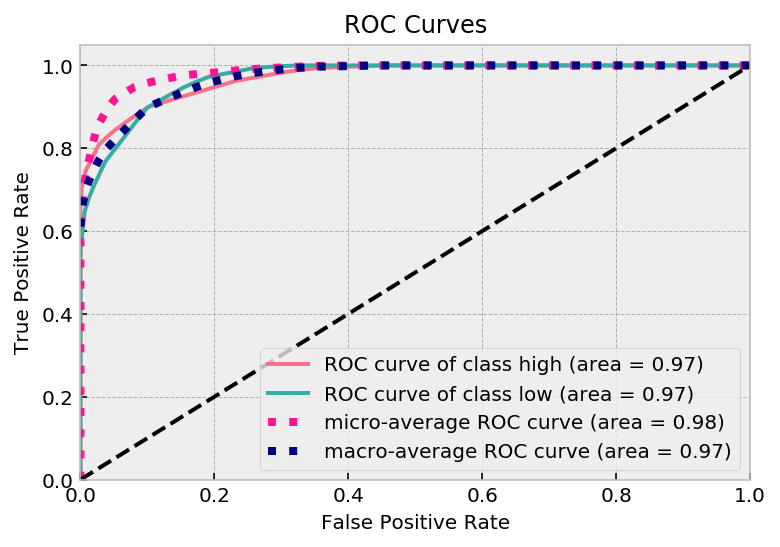

In [262]:
skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap)
plt.show()

> The decision tree classifier is by far the best model with the best score and the highest accuracy and precision and recall scores and ROC curve. The scores decrease where the sample sizes reduce and the proportion of high to low salary decreases so the model has less data available for which to prediciton a binary result for high salary.

## Bagging Decision Tree Classifier

In [268]:
kw = dtc_gridsearch.best_params_

In [269]:
bcclf = BaggingClassifier(base_estimator=DecisionTreeClassifier(**kw), 
                          oob_score=True)
bcclf.fit(X_train, y_train)

/Users/mymacbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/mymacbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.001,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=30,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [270]:
print(cross_val_score(bcclf, X_train, y_train, cv=10, n_jobs=2).mean())

0.8303116769095699


In [271]:
predictions = bcclf.predict(X_test)
accuracy_score(y_test, predictions)

0.8823529411764706

In [272]:
bcclf.score(X_train, y_train)

0.9557522123893806

In [273]:
bcclf.score(X_test, y_test)

0.8823529411764706

In [274]:
bcclf.oob_score_

0.7876106194690266

In [404]:
dump(bcclf, 'bcclf_indeed.joblib') 
bcclf = load('bcclf_indeed.joblib') 

In [277]:
bc_params = {'max_samples': np.linspace(0.1, 1.0, 8), 
             'max_features': np.linspace(0.1, 1.0, 8),  
             'n_estimators': [10, 20, 30, 30, 40, 50, 60, 70, 80, 90 ,100]}

bc_gridsearch = GridSearchCV(bcclf, bc_params, n_jobs=2, cv=5, verbose=1, return_train_score=True)

In [278]:
bc_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 704 candidates, totalling 3520 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 650 tasks      | elapsed:   28.6s
[Parallel(n_jobs=2)]: Done 800 tasks      | elapsed:   47.4s
[Parallel(n_jobs=2)]: Done 1050 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 1400 tasks      | elapsed:  2.1min
[Parallel(n_jobs=2)]: Done 1850 tasks      | elapsed:  3.0min
[Parallel(n_jobs=2)]: Done 2400 tasks      | elapsed:  4.3min
[Parallel(n_jobs=2)]: Done 3050 tasks      | elapsed:  6.0min
[Parallel(n_jobs=2)]: Done 3520 out of 3520 | elapsed:  7.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.001,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=30,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                         

In [279]:
print(bc_gridsearch.best_params_)

{'max_features': 0.7428571428571429, 'max_samples': 0.6142857142857143, 'n_estimators': 20}


In [280]:
print(bc_gridsearch.best_score_) #mean cv score

0.8481263616557735


In [281]:
print(bc_gridsearch.best_estimator_.estimators_samples_)

[array([622, 360, 204, 209, 533, 463, 118, 525, 296, 398, 204, 505, 353,
        96, 593, 197,  16, 312, 103, 330, 197, 195, 571, 358, 130, 188,
       343, 136, 610, 138, 367, 560, 210, 671, 213, 284, 521, 309, 529,
       113, 624, 179, 541, 567, 203,  76, 564, 273, 190, 127,  89,  92,
       257, 505,  22, 610, 655, 200, 659, 452, 452, 320, 631, 247, 360,
       205,  84, 342, 495,  88, 137, 500, 418, 399, 566, 348, 415, 151,
       102,  70, 665, 125, 339, 389, 439,   7,  22, 247, 526, 660, 469,
        20,  84, 463, 153, 262, 468, 253, 255, 120, 233,  27,  43, 350,
       172, 230, 294, 318,   8, 567, 154, 360,  97, 245, 459, 367, 206,
       401, 242, 154, 187, 205, 193, 439, 578, 471, 640,  56, 618, 307,
       251, 573, 166, 144, 235, 378, 183,  33, 434, 324, 174, 444, 207,
       264, 140, 247, 459, 103,  15, 393, 579,  30, 136, 321, 672, 641,
       461,   9, 163, 380,  99, 280,  81, 409,  66, 433, 444, 511, 282,
       391, 289, 561, 230, 145, 398, 427, 354, 412, 295, 276, 3

In [282]:
print(bc_gridsearch.best_estimator_.estimators_features_) # 

[array([121,  14,  48, 126,   4, 151,  46, 106, 158, 155, 149, 162,  35,
        69, 101,  57,  79,  18, 157,  52,  16, 104,  78, 139,  75, 123,
        70,  11,  50,  49,  41, 161, 125, 122,  59, 146, 142, 156,  93,
        94,  33,  23,  68, 163,  29,   3, 114,  86, 110,  28,  47,  91,
       160, 152, 105,  62,  55,  31,  40,  98,   8, 135, 103, 120,  64,
        77, 134,  15,  61,  82,  34, 129, 150, 131, 153,  13, 133, 128,
       144,  24, 148, 138,  30, 130, 117,   5,  37,   1,  44,  90,  96,
        65,  67,  25,  36,  74,  58,  72, 154,   7, 100,  63,  89, 108,
       143,   6, 118,  87,  20,   2,  27, 136,  54, 140,  97,  32,  83,
       147,  22,  17,  73]), array([ 55,  31,  23,  37,  39,  82,  59,  62, 143, 116,  87, 128, 133,
       147,  83, 102, 111, 153,  93, 110,  98,  69,  68, 103,  51, 162,
        65,  97, 130, 136,  92,   8,  95, 118,  25,  24,  11,  40,  28,
        91, 159, 148, 115,  88,  33,  22, 135,   7,  71, 142,  76,  36,
       158,  53, 140,  67, 155,  2

In [284]:
print(bc_gridsearch.best_estimator_.base_estimator_) # there will be many base estimators

DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='gini',
                       max_depth=None, max_features=30, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [287]:
dump(bc_gridsearch, 'bc_gridsearch_indeed.joblib') 
bc_gridsearch = load('bc_gridsearch_indeed.joblib') 

In [298]:
sub_features = [rf_coefficient_df['Features']
                for feature in bcclf.estimators_features_[0]]

list(sub_features)

[0                  Government
 1                   Education
 2                      Health
 3                       Royal
 4                 Recruitment
                 ...          
 159        location_Wokingham
 160    location_Wolverhampton
 161        location_Worcester
 162      location_Wythenshawe
 163             location_York
 Name: Features, Length: 164, dtype: object,
 0                  Government
 1                   Education
 2                      Health
 3                       Royal
 4                 Recruitment
                 ...          
 159        location_Wokingham
 160    location_Wolverhampton
 161        location_Worcester
 162      location_Wythenshawe
 163             location_York
 Name: Features, Length: 164, dtype: object,
 0                  Government
 1                   Education
 2                      Health
 3                       Royal
 4                 Recruitment
                 ...          
 159        location_Wokingham
 160    loc

###### Ada Boost Classifier

In [300]:
base_estimator = DecisionTreeClassifier(max_depth=3, max_features=0.3)
abc = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=100,
                           random_state=1)
abc.fit(X_train, y_train)

print(abc.score(X_train, y_train))
print(cross_val_score(abc, X_train, y_train, cv=5).mean())
print(abc.score(X_test, y_test))

0.9778761061946902
0.7876470588235294
0.8705882352941177


In [301]:
abc.estimators_[-1].predict(X_test)

array(['high', 'high', 'high', 'low', 'high', 'high', 'high', 'high',
       'high', 'low', 'high', 'high', 'high', 'low', 'high', 'high',
       'high', 'high', 'high', 'high', 'high', 'high', 'low', 'high',
       'high', 'low', 'high', 'low', 'high', 'high', 'high', 'low',
       'high', 'low', 'high', 'high', 'high', 'high', 'high', 'high',
       'high', 'low', 'high', 'high', 'high', 'high', 'high', 'high',
       'high', 'high', 'high', 'high', 'high', 'high', 'high', 'high',
       'high', 'high', 'high', 'high', 'low', 'low', 'high', 'high',
       'high', 'high', 'high', 'high', 'high', 'high', 'high', 'high',
       'low', 'high', 'low', 'high', 'high', 'low', 'high', 'high',
       'high', 'high', 'high', 'high', 'high', 'high', 'high', 'high',
       'low', 'high', 'low', 'high', 'high', 'high', 'high', 'high',
       'high', 'high', 'high', 'high', 'high', 'low', 'high', 'high',
       'high', 'high', 'low', 'high', 'high', 'low', 'high', 'high',
       'high', 'low', 'lo

In [302]:
pd.DataFrame(abc.staged_predict(X_test))

0    1    2    3    4    5    6    7     8    9    ...  160   161   162  \
0    low  low  low  low  low  low  low  low   low  low  ...  low  high   low   
1    low  low  low  low  low  low  low  low  high  low  ...  low  high   low   
2    low  low  low  low  low  low  low  low  high  low  ...  low  high   low   
3    low  low  low  low  low  low  low  low  high  low  ...  low  high   low   
4    low  low  low  low  low  low  low  low  high  low  ...  low  high   low   
..   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...   ...   ...   
95  high  low  low  low  low  low  low  low  high  low  ...  low  high  high   
96  high  low  low  low  low  low  low  low  high  low  ...  low  high  high   
97  high  low  low  low  low  low  low  low  high  low  ...  low  high  high   
98  high  low  low  low  low  low  low  low  high  low  ...  low  high  high   
99  high  low  low  low  low  low  low  low  high  low  ...  low  high  high   

     163  164  165   166  167   168  169  
0    low  low  low   low  low   low  low  
1    low  low  low   low  low   low  low  
2    low  low  low   low  low   low  low  
3    low  low  low   low  low  high  low  
4    low  low  low   low  low  high  low  
..   ...  ...  ...   ...  ...   ...  ...  
95  high  low  low  high  low   low  low  
96  high  low  low  high  low   low  low  
97  high  low  low  high  low   low  low  
98  high  low  low  high  low   low  low  
99  high  low  low  high  low   low  low  

[100 rows x 170 columns]

In [303]:
# accuracy scores up to given stage
list(abc.staged_score(X_test, y_test))[:10]

[0.7764705882352941,
 0.7941176470588235,
 0.7941176470588235,
 0.7941176470588235,
 0.8117647058823529,
 0.8058823529411765,
 0.8058823529411765,
 0.8117647058823529,
 0.8058823529411765,
 0.8117647058823529]

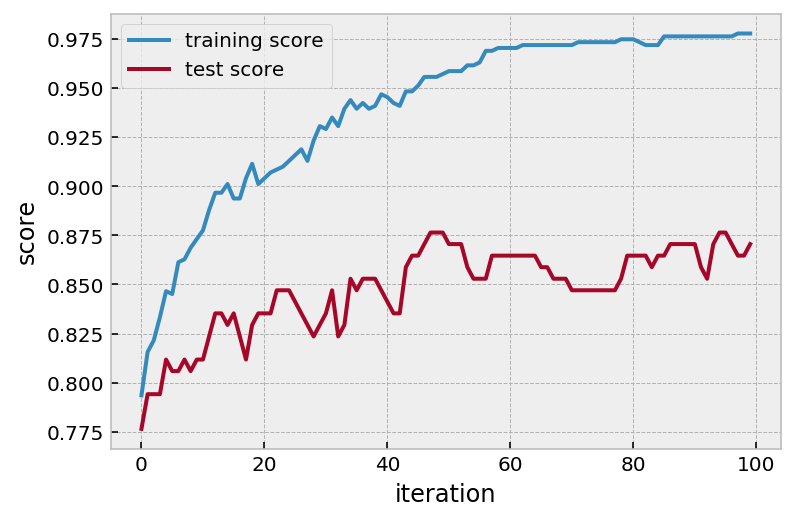

In [304]:
plt.plot(list(abc.staged_score(X_train, y_train)),
         label='training score', lw=2)
plt.plot(list(abc.staged_score(X_test, y_test)), label='test score', lw=2)
plt.xlabel('iteration')
plt.ylabel('score')
plt.legend()
plt.show()

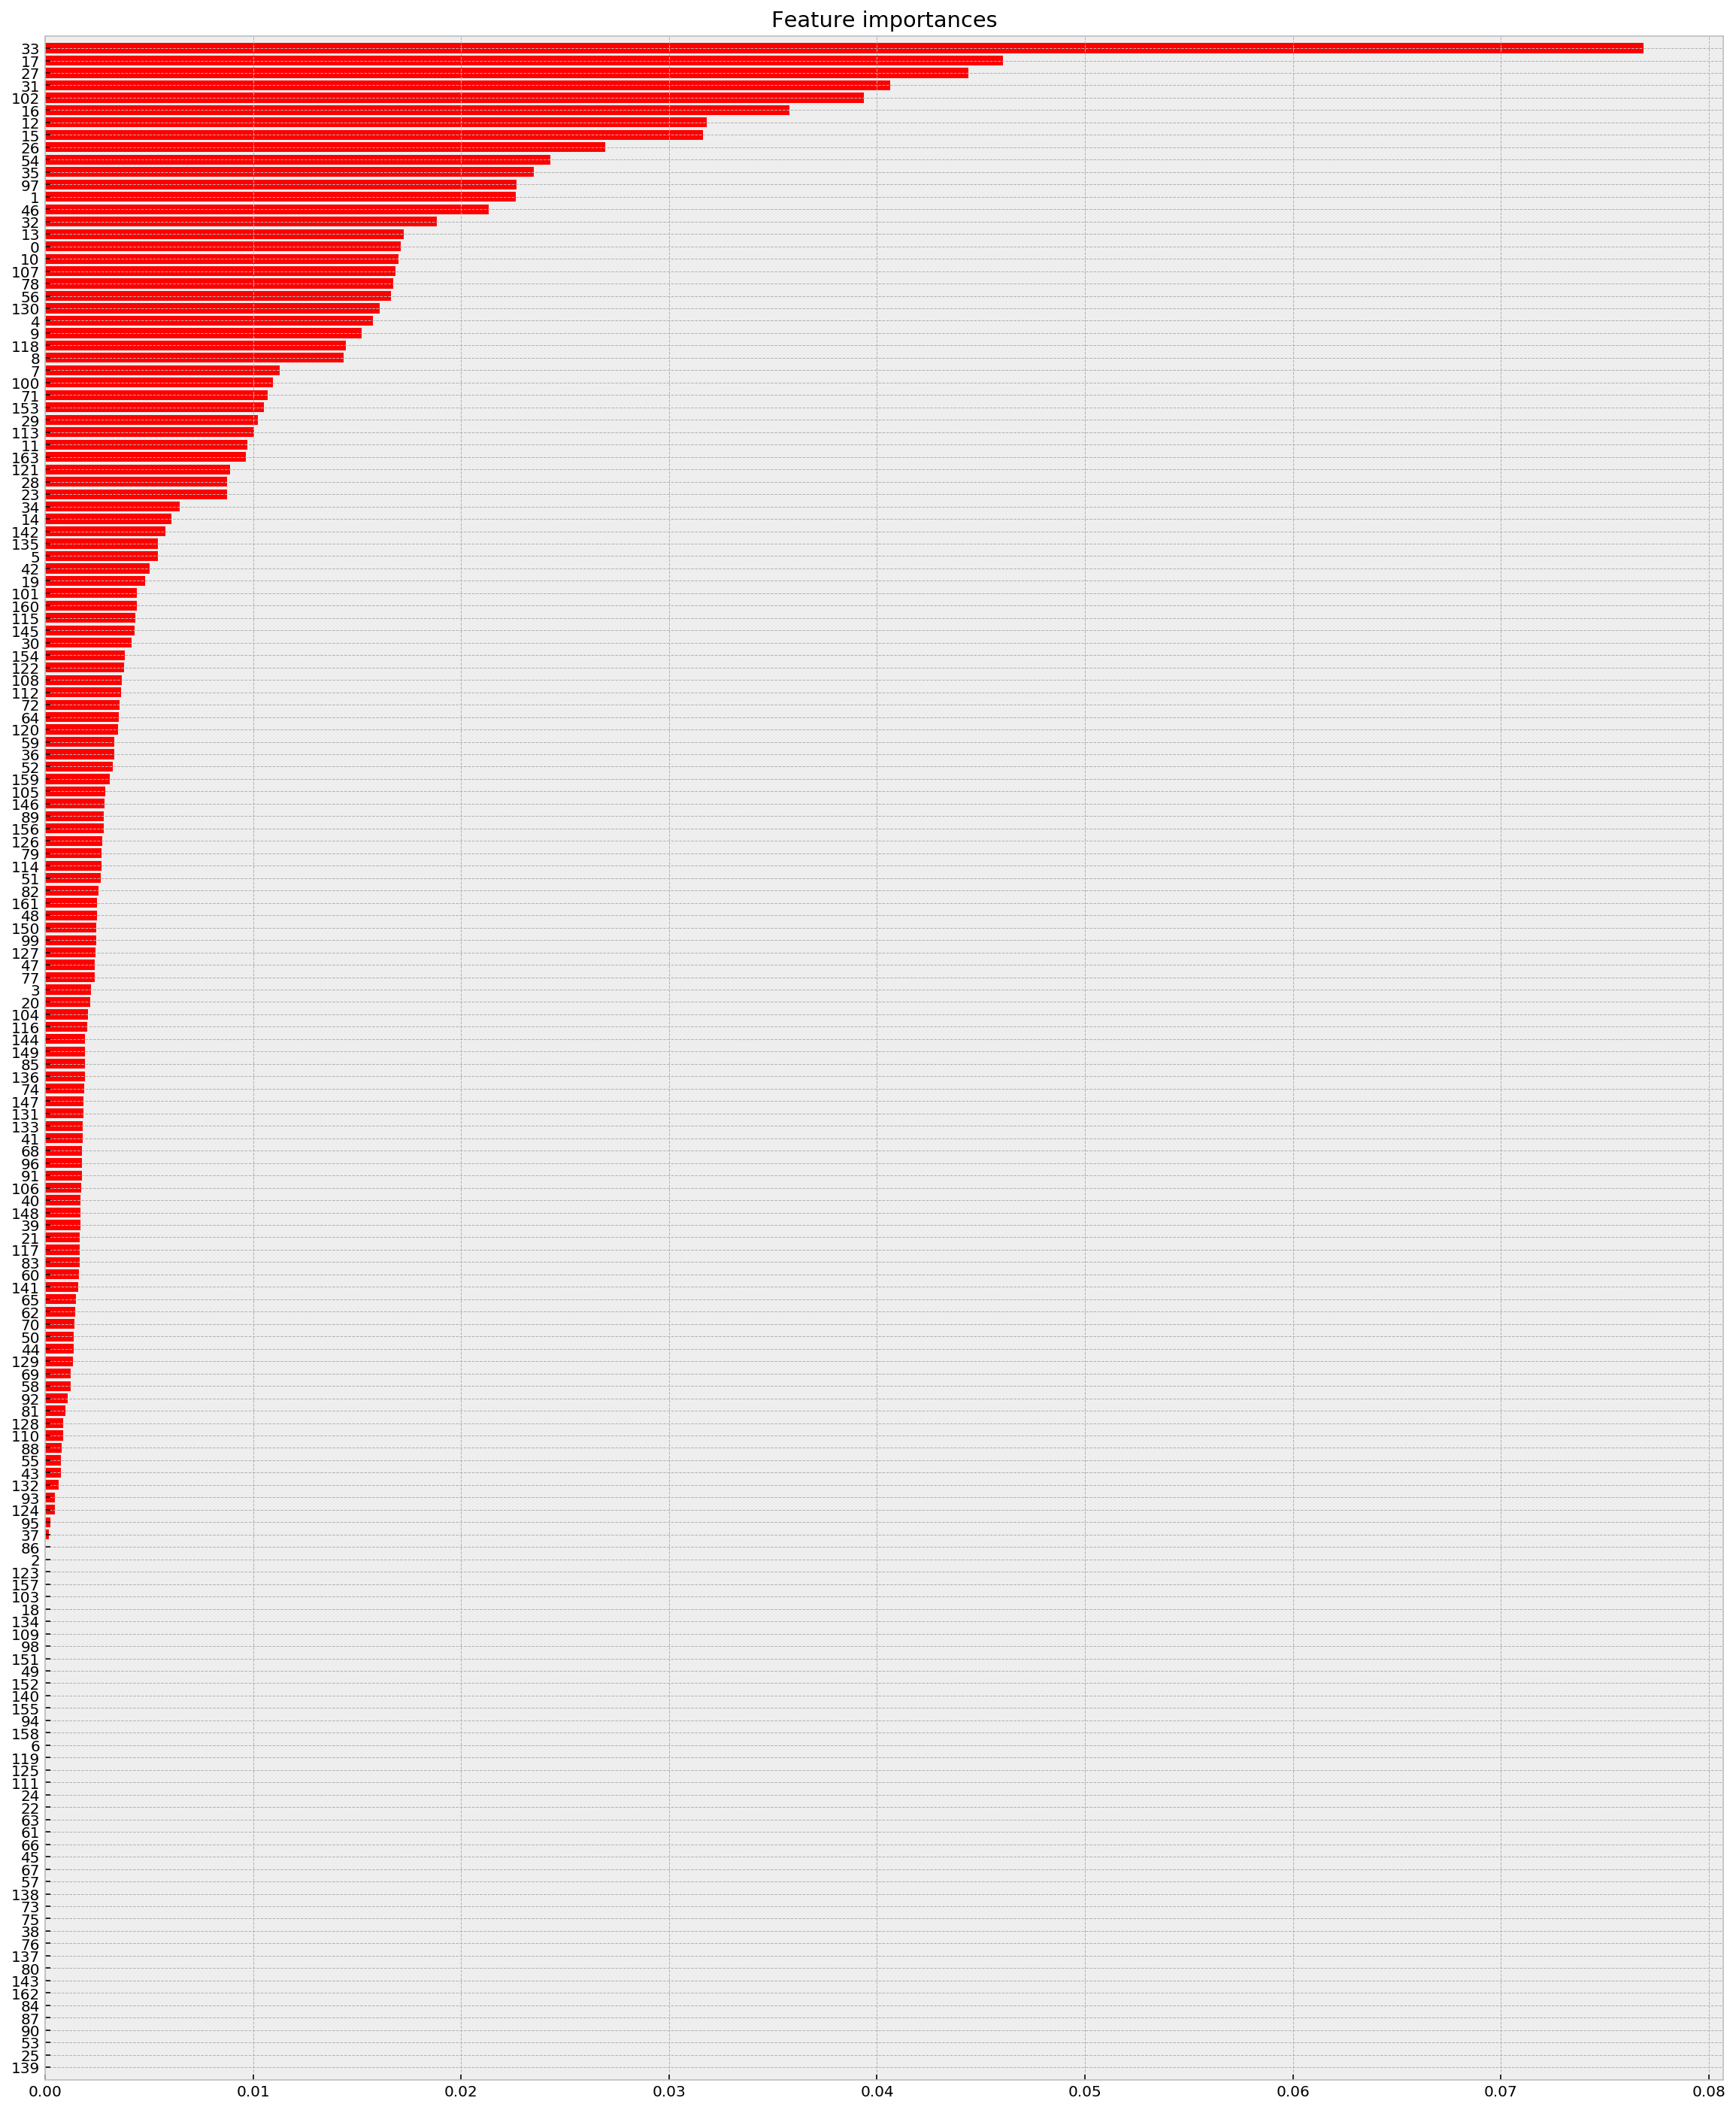

In [316]:
importances = abc.feature_importances_
std = np.std([abc.feature_importances_ for tree in abc.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the adaboost
plt.figure(figsize=(20,25))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()

### Model evaluation:

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs.


- Use cross-validation to evaluate your models.
- Evaluate the accuracy, AUC, precision and recall of the models.
- Plot the ROC and precision-recall curves for at least one of your models.

#### Taken best score from LR grid search

In [389]:
lr_model = LogisticRegression(solver='liblinear', C=0.1707352647470692, penalty='l1', max_iter=100000)
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.1707352647470692, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000, multi_class='auto', n_jobs=None,
                   penalty='l1', random_state=None, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)

In [390]:
print("Lr Train score", lr_model.score(X_train, y_train))
print("Mean CV score: ", cross_val_score(lr_model, X_train, y_train, cv=5).mean())
print("Lr Test score", lr_model.score(X_test, y_test))

Mean CV score:  0.7950326797385621
Lr Train score 0.8392330383480826
Lr Test score 0.8


In [396]:
coefficient_df = pd.DataFrame()
coefficient_df['Features'] = X_train.columns
coefficient_df['LR_Coefficients'] = lrgs.best_estimator_.coef_[0]
coefficient_df['absolutes'] = abs(lrgs.best_estimator_.coef_[0])

In [397]:
coefficient_df.sort_values(by='absolutes',ascending=False).head(10)

Features  LR_Coefficients  absolutes
8        Data Scientist        -0.472779   0.472779
102     location_London        -0.388317   0.388317
33               Senior        -0.361950   0.361950
27              Analyst         0.353383   0.353383
14     Machine Learning        -0.346314   0.346314
1             Education         0.328104   0.328104
78     location_Glasgow        -0.311724   0.311724
121    location_Reading        -0.267573   0.267573
56   location_Cambridge        -0.257849   0.257849
55    location_Caldicot        -0.192541   0.192541

In [379]:
predictions_train = lrgs.predict(X_train)
predictions_test = lrgs.predict(X_test)

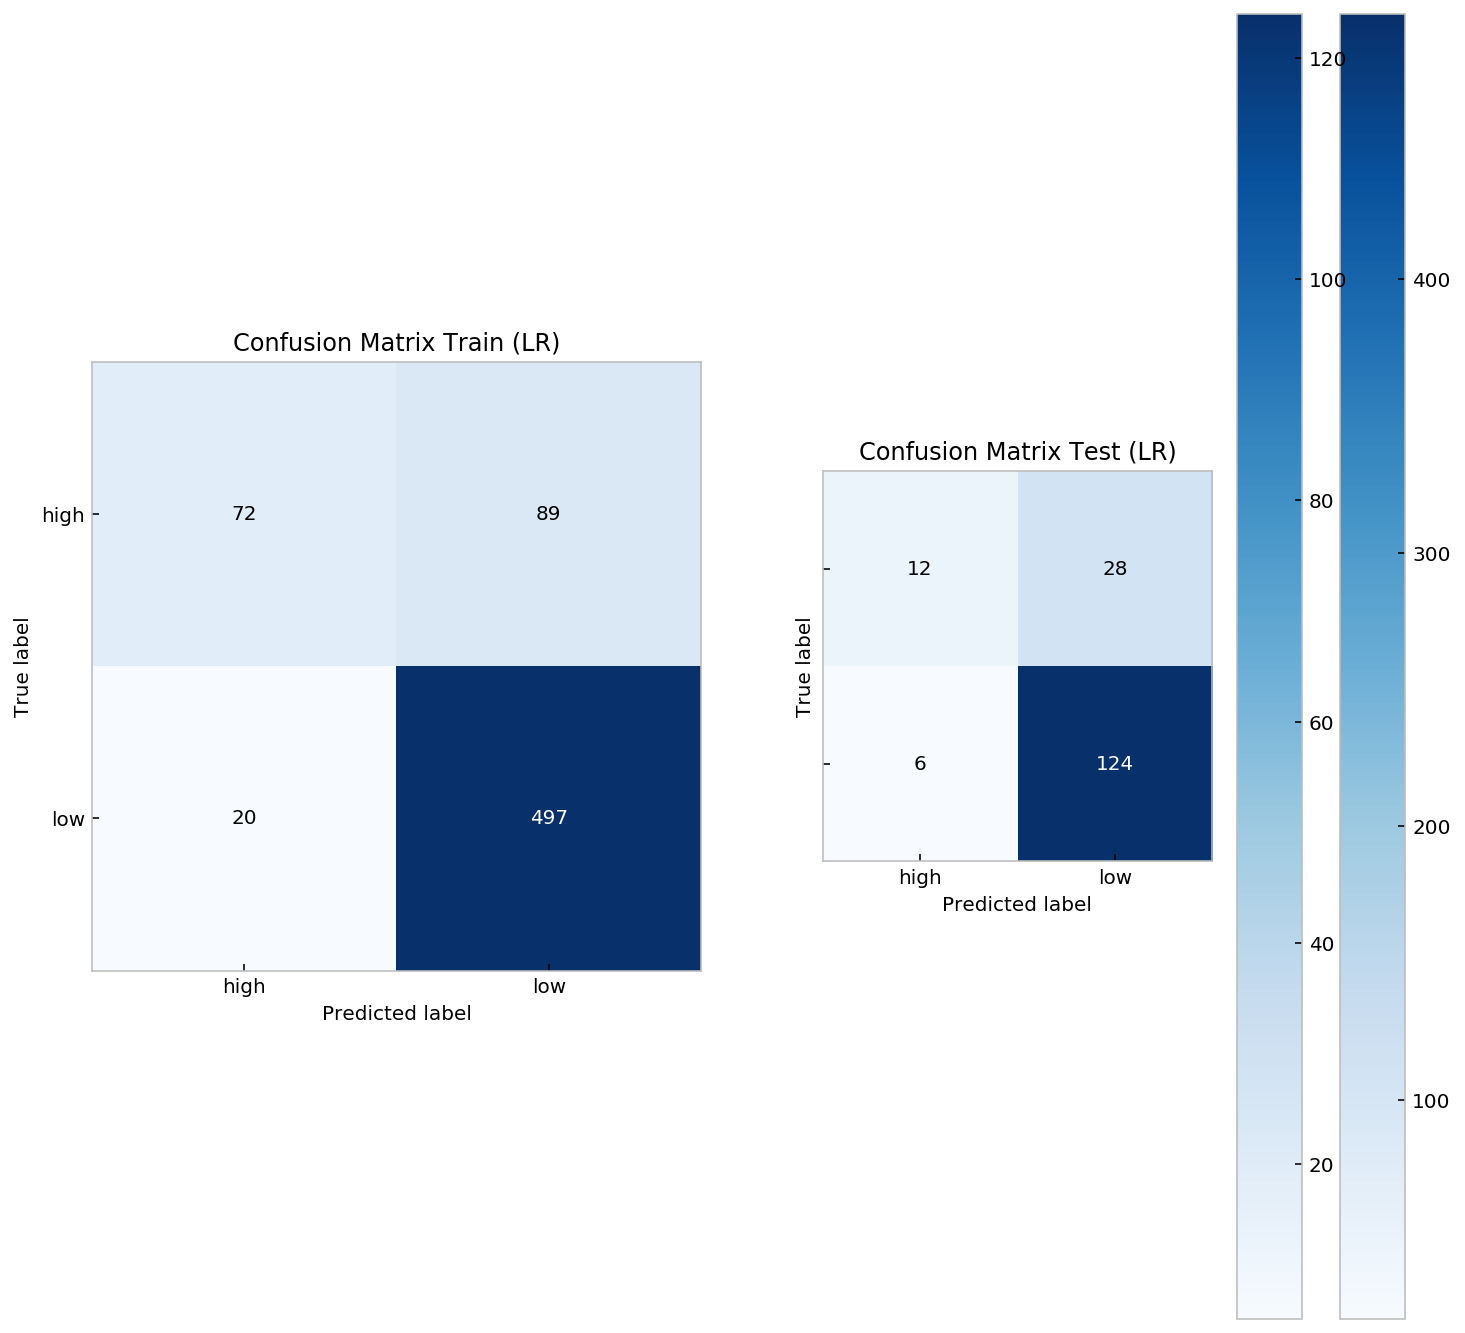

In [380]:
fig_pr, ax = plt.subplots(ncols=2, figsize=(12, 12), sharey=True)
skplt.metrics.plot_confusion_matrix(y_train, predictions_train, ax=ax[0], title='Confusion Matrix Train (LR)')
skplt.metrics.plot_confusion_matrix(y_test, predictions_test, ax=ax[1], title='Confusion Matrix Test (LR)')
plt.show()

In [391]:
print(classification_report(y_train, predictions_train, labels =lr_model.classes_))

              precision    recall  f1-score   support

        high       0.78      0.45      0.57       161
         low       0.85      0.96      0.90       517

    accuracy                           0.84       678
   macro avg       0.82      0.70      0.74       678
weighted avg       0.83      0.84      0.82       678



In [382]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

        high       0.67      0.30      0.41        40
         low       0.82      0.95      0.88       130

    accuracy                           0.80       170
   macro avg       0.74      0.63      0.65       170
weighted avg       0.78      0.80      0.77       170



> The baseline accuracy is 0.763. And this the adjustment LR model train score is 0.839 and test score is 0.8 and mean cv is 0.795. The model predictions make a slightly better prediciton of high / low salary jobs.

> The LR gridsearch best predictors for high salary job are Data Scientist, location_London, Senior, Analyst, Machine Learning.	

> I evaluated the LR model using Precision, Recall and F1 score. 

> The Precision here looks how accurate the model is. The formula to calculate the precision takes the False Positive and devides it by True Postive + False positive as the denominator. Precision is a good measure to determine when the costs of false Positive is high. A prediction of 0.78 for high salary means that there are less False Positives. So a high salary job is less like to be classified as a low salary job. However, a low salary job is more likely to be classified as a high salary job. In recall the  the score for high salary jobs being classified as low if low considerably smaller meaning that they are more likely to be classified at low salary jobs. This is less risky but none the less, not an ideal situation. I believe I may have used quite a variety of predictors and possible did not label them correctly. Also, I didn't filter out jobs that weren't strictly data science so kept them in so I guess the ability of the model to make accurate predictions was vastly reduced.

In [384]:
lrgs_probabilities_train = lrgs.predict_proba(X_train)
lrgs_probabilities_test = lrgs.predict_proba(X_test)

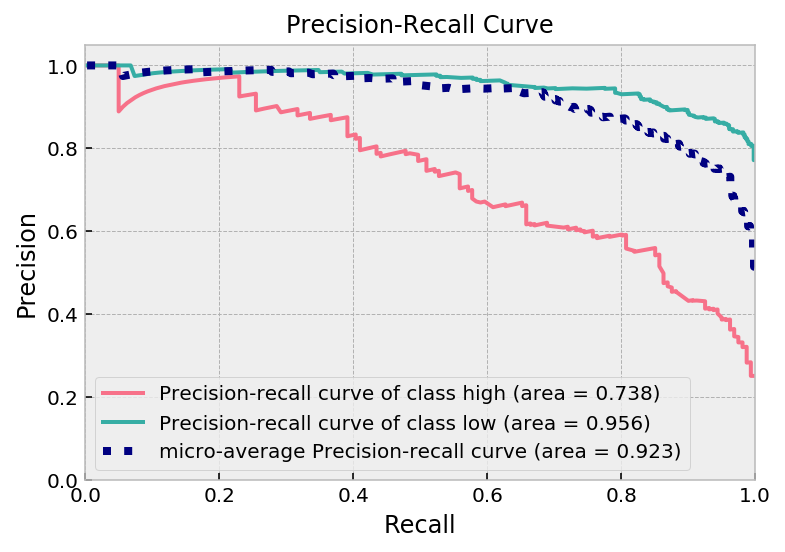

In [385]:
cmap = ListedColormap(sns.color_palette("husl", len(lrgs.classes_)))
skplt.metrics.plot_precision_recall(y_train, lrgs_probabilities_train, cmap=cmap)
plt.show()

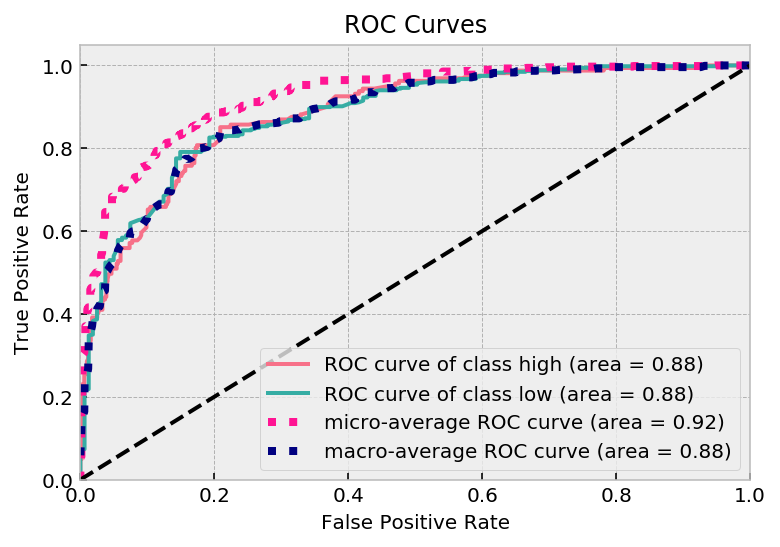

In [386]:
skplt.metrics.plot_roc(y_train, lrgs_probabilities_train, cmap=cmap)
plt.show()

In [393]:
def plot_f1_lines(figsize=(8,6),fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)
    
    # add lines of constant F1 scores
    
    for const in np.linspace(0.2,0.9,8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                 color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                     xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

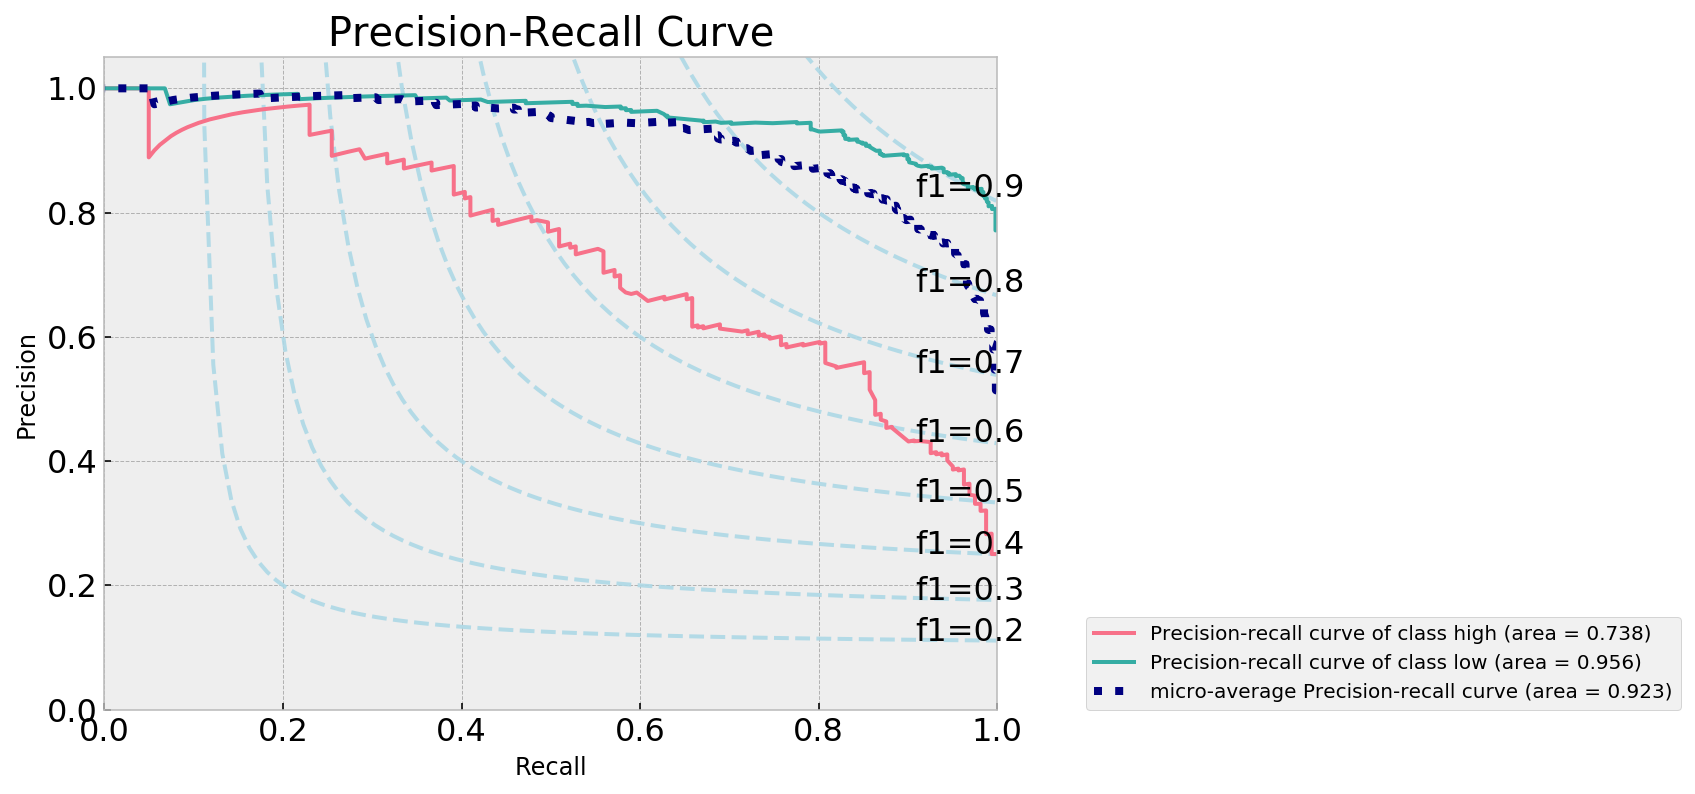

In [394]:
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_train, lrgs_probabilities_train, 
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### Bonus:

- Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.
- Obtain the ROC/precision-recall curves for the different models you studied (at least the tuned model of each category) and compare.

In [16]:
## YOUR CODE HERE

### Summarize your results in an executive summary written for a non-technical audience.
   
- Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

The baseline score is 0.76

For the Logistic Regression Gridsearch accuracy is high on both the train and test classification report where it is 84% and 80%, respectively. This is a measure of the True Positive and True Negative over the total observations and as this score is high and is above the baseline I can take this as indication that the model is classifying the majority of the results correctly. The only flag here is that is the recall score for high salary on both the train and test and the preicion score for the high salary is low or below the baseline score. The precision and recall are both summarised in the F1 score. So let me start with the former, since precision is a measure of the False Positive rate which is less of a problem than the False Negative (in the recall). The False Positive rate that the linear regression grid search is classifying low salary as high salary. Whereas the recall is indicating poor result as it is classifying a larger proportion of high salary as low salary. This may be becuase the sample size is small where the train consists of 80% of the total of 848 and the test consists of 20% of the total of 848. For high results I would consider getting some more data but also perhap performing some more modelling and possibly using NLP and stemming and lemmatization to retrieve keys word in the document although myfor loop does a good job of this I am not sure how accurate it is.

The Random Forest is a supervised learning algorithm that randomly creates and merges multiple decision trees into one “forest.” A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models. This is where the wisdom of the individual models comes into play. The results from this model are pretty consistent with the other models. The classification report reports poorer accuracy and the recall score for the high band for both train and test are low at 0.20. The algorithm hasn't been able to train enough to determine high vs low. This could potentially be attributed to the low sample size in the test at 40 only.

Some of the best scores were received by the Decision Tree Classifier. The DTC is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter. To prevent overfitting I kept the hyperparmeters minimal, only including a few options for max depth, max features, min sample leaf, ccp_alpha. This forced the model pick the features that would get the largest information gain at the beginning and discarding features that do not have an impact early on. Therefore, the accuracy in classifying True Positive and True Negative is highest with with 0.93 and 0.85 for train and test, respectively. The F1 score is 0.85 and 0.62 respectively.

I then used the Bagging (Bootstrap Aggregation) on the Decision Tree Classifier, this is used when our goal is to reduce the variance of a decision tree. Here idea is to create several subsets of data from training sample chosen randomly with replacement. Now, each collection of subset data is used to train their decision trees. The results here are  superior to all the other models. The oob score which is a score similar to cross validation in regression models, what sets it apart is that instead of setting aside a part of the dataset for cross validation which is useful for larger dataset (not in this case). It bagging therefore doesn't consume all of the training dataset therefore creates a good tradeoff. The OOB (out of bag) score leads to reducing the overall aggregation effect in the bagging. Therefore validation on a dull ensemble of decision trees is better than a subset for estimating the score. It should be noted that they are also both calculated in different ways so should not be compared.

The Adaboost classifier is a boosting algorithm that combines multiple low accuracy(or weak) models to create a high accuracy(or strong) models. The aim is of creating an improved classifier to increase performance. Here, individual classifier vote and final prediction label returned that performs majority voting. Ensemble methods can decrease variance using bagging approach, bias using a boosting approach.

For the final two models I would have liked to have done some more visualisation unfortunately my time got taken doing the scraping. Having now done this project I would very much like to go back and improve the models and include some more data to see what result I would get. I would consider using Extra Trees Classifier, Gradient Boosting Classifier and the associated regressors.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### BONUS

Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

In [18]:
## YOUR LINK HERE IN MARKDOWN FORMAT 